In [1]:
# packages
import pandas as pd
import numpy as np
import math
import pickle
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import fcluster, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from claspy.segmentation import BinaryClaSPSegmentation

import ruptures as rpt

import stumpy
from aeon.segmentation import find_dominant_window_sizes

from aeon.segmentation import GreedyGaussianSegmenter

from aeon.segmentation import InformationGainSegmenter

from aeon.anomaly_detection import STRAY

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, make_scorer,mean_squared_error
from ruptures.metrics import precision_recall
import matplotlib.pyplot as plt
#from aeon.visualisation import plot_series_with_change_points, plot_series_with_profiles
import seaborn as sns

sns.set_theme()
sns.set_color_codes()

from claspy.tests.evaluation import f_measure,covering

from claspy.window_size import dominant_fourier_frequency, highest_autocorrelation, suss

C:\Users\tikyn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\aeon\base\__init__.py:24: FutureWarning: The aeon package will soon be releasing v1.0.0 with the removal of legacy modules and interfaces such as BaseTransformer and BaseForecaster. This will contain breaking changes. See aeon-toolkit.org for more information. Set aeon.AEON_DEPRECATION_WARNING or the AEON_DEPRECATION_WARNING environmental variable to 'False' to disable this warning.
  warnings.warn(


Extracted features. Use the index of this list to use with iloc[]
<ol start="0">
  <li>Kinetic Global</li>
  <li>Kinetic Chest</li>
  <li>Directness Head</li>
  <li>Density</li>
  <li>left wrist ke</li>
  <li>right wrist ke</li>
  <li>left ankle ke</li>
  <li>right ankle ke</li>
  <li>head ke</li>
  <li>crouch density</li>
  <li>left leg density</li>
  <li>right leg density</li>
  <li>left hand density</li>
  <li>right hand density</li>
  <li>head density</li>
  <li>arto inferiore</li>
  <li>gamba</li>
  <li>coscia</li>
  <li>coscia dx</li>
  <li>coscia sx</li>
  <li>gamba sx</li>
  <li>gamba dx</li>
  <li>braccio sx</li>
  <li>braccio dx</li>
  <li>avambraccio sx</li>
  <li>avambraccio dx</li>
  <li>ARIEL speed magnitude</li>
  <li>ARIEL speed X component</li>
  <li>ARIEL speed Y component</li>
  <li>ARIEL speed Z component</li>
  <li>ARIEL acceleration magnitude</li>
  <li>ARIEL acceleration X component</li>
  <li>ARIEL acceleration Y component</li>
  <li>ARIEL acceleration Z component</li>
  <li>ARIEL jerk magnitude</li>
  <li>ARIEL jerk X component</li>
  <li>ARIEL jerk Y component</li>
  <li>ARIEL jerk Z component</li>
  <li>STRN speed magnitude</li>
  <li>STRN speed X component</li>
  <li>STRN speed Y component</li>
  <li>STRN speed Z component</li>
  <li>STRN acceleration magnitude</li>
  <li>STRN acceleration X component</li>
  <li>STRN acceleration Y component</li>
  <li>STRN accelerationZ component</li>
  <li>STRN jerk magnitude</li>
  <li>STRN jerk X component</li>
  <li>STRN jerk Y component</li>
  <li>STRN jerk Z component</li>
  <li>RHEL speed magnitude</li>
  <li>RHEL speed X component</li>
  <li>RHEL speed Y component</li>
  <li>RHEL speed Z component</li>
  <li>RHEL acceleration magnitude</li>
  <li>RHEL acceleration X component</li>
  <li>RHEL acceleration Y component</li>
  <li>RHEL acceleration Z component</li>
  <li>RHEL jerk magnitude</li>
  <li>RHEL jerk X component</li>
  <li>RHEL jerk Y component</li>
  <li>RHEL jerk Z component</li>
  <li>LHEL speed magnitude</li>
  <li>LHEL speed X component</li>
  <li>LHEL speed Y component</li>
  <li>LHEL speed Z component</li>
  <li>LHEL acceleration magnitude</li>
  <li>LHEL acceleration X component</li>
  <li>LHEL acceleration Y component</li>
  <li>LHEL acceleration Z component</li>
  <li>LHEL jerk magnitude</li>
  <li>LHEL jerk X component</li>
  <li>LHEL jerk Y component</li>
  <li>LHEL jerk Z component</li>
  <li>RPLM speed magnitude</li>
  <li>RPLM speed X component</li>
  <li>RPLM speed Y component</li>
  <li>RPLM speed Z component</li>
  <li>RPLM acceleration magnitude</li>
  <li>RPLM acceleration X component</li>
  <li>RPLM acceleration Y component</li>
  <li>RPLM acceleration Z component</li>
  <li>RPLM jerk magnitude</li>
  <li>RPLM jerk X component</li>
  <li>RPLM jerk Y component</li>
  <li>RPLM jerk Z component</li>
  <li>LPLM speed magnitude</li>
  <li>LPLM speed X component</li>
  <li>LPLM speed Y component</li>
  <li>LPLM speed Z component</li>
  <li>LPLM acceleration magnitude</li>
  <li>LPLM acceleration X component</li>
  <li>LPLM acceleration Y component</li>
  <li>LPLM acceleration Z component</li>
  <li>LPLM jerk magnitude</li>
  <li>LPLM jerk X component</li>
  <li>LPLM jerk Y component</li>
  <li>LPLM jerk Z component</li>




</ol>

In [2]:
# list of features. To access its name or its value while using iloc
features_name=[
    "kinetic_global",
    "kinetic_chest",
    "directness_head",
    "density",
    "left_wrist_ke",
    "right_wrist_ke",
    "left_ankle_ke",
    "right_ankle_ke",
    "head_ke",
    "crouch_density",
    "left_leg_density",
    "right_leg_density",
    "left_hand_density",
    "right_hand_density",
    "head_density",
    "arto_inferiore",
    "gamba",
    "coscia",
    "coscia_dx",
    "coscia_sx",
    "gamba_sx",
    "gamba_dx",
    "braccio_sx",
    "braccio_dx",
    "avambraccio_sx",
    "avambraccio_dx",
    "ARIEL_speed_magnitude",
    "ARIEL_speed_X_component",
    "ARIEL_speed_Y_component",
    "ARIEL_speed_Z_component",
    "ARIEL_acceleration_magnitude",
    "ARIEL_acceleration_X_component",
    "ARIEL_acceleration_Y_component",
    "ARIEL_acceleration_Z_component",
    "ARIEL_jerk_magnitude",
    "ARIEL_jerk_X_component",
    "ARIEL_jerk_Y_component",
    "ARIEL_jerk_Z_component",
    "STRN_speed_magnitude",
    "STRN_speed_X_component",
    "STRN_speed_Y_component",
    "STRN_speed_Z_component",
    "STRN_acceleration_magnitude",
    "STRN_acceleration_X_component",
    "STRN_acceleration_Y_component",
    "STRN_acceleration_Z_component",
    "STRN_jerk_magnitude",
    "STRN_jerk_X_component",
    "STRN_jerk_Y_component",
    "STRN_jerk_Z_component",
    "RHEL_speed_magnitude",
    "RHEL_speed_X_component",
    "RHEL_speed_Y_component",
    "RHEL_speed_Z_component",
    "RHEL_acceleration_magnitude",
    "RHEL_acceleration_X_component",
    "RHEL_acceleration_Y_component",
    "RHEL_acceleration_Z_component",
    "RHEL_jerk_magnitude",
    "RHEL_jerk_X_component",
    "RHEL_jerk_Y_component",
    "RHEL_jerk_Z_component",
    "LHEL_speed_magnitude",
    "LHEL_speed_X_component",
    "LHEL_speed_Y_component",
    "LHEL_speed_Z_component",
    "LHEL_acceleration_magnitude",
    "LHEL_acceleration_X_component",
    "LHEL_acceleration_Y_component",
    "LHEL_acceleration_Z_component",
    "LHEL_jerk_magnitude",
    "LHEL_jerk_X_component",
    "LHEL_jerk_Y_component",
    "LHEL_jerk_Z_component",
    "RPLM_speed_magnitude",
    "RPLM_speed_X_component",
    "RPLM_speed_Y_component",
    "RPLM_speed_Z_component",
    "RPLM_acceleration_magnitude",
    "RPLM_acceleration_X_component",
    "RPLM_acceleration_Y_component",
    "RPLM_acceleration_Z_component",
    "RPLM_jerk_magnitude",
    "RPLM_jerk_X_component",
    "RPLM_jerk_Y_component",
    "RPLM_jerk_Z_component",
    "LPLM_speed_magnitude",
    "LPLM_speed_X_component",
    "LPLM_speed_Y_component",
    "LPLM_speed_Z_component",
    "LPLM_acceleration_magnitude",
    "LPLM_acceleration_X_component",
    "LPLM_acceleration_Y_component",
    "LPLM_acceleration_Z_component",
    "LPLM_jerk_magnitude",
    "LPLM_jerk_X_component",
    "LPLM_jerk_Y_component",
    "LPLM_jerk_Z_component",
]

In [3]:
def f1scoremargin(ground_truth, predictions, tolerance):
    """
    Calcola l'F1 score con una finestra di tolleranza sui change points.
    
    :param ground_truth: Lista o array di change points reali
    :param predictions: Lista o array di change points predetti
    :param tolerance: La tolleranza temporale (numero di unità temporali)
    :return: precision, recall, f1-score
    """
    ground_truth = np.array(ground_truth)
    predictions = np.array(predictions)
    
    # Vettori per tracciare quali punti sono stati già associati
    matched_ground_truth = np.zeros(len(ground_truth), dtype=bool)
    matched_predictions = np.zeros(len(predictions), dtype=bool)

    mgt={key: False for key in ground_truth}
    mcp={key: False for key in predictions}
    #print(f'gt:{len(ground_truth)} - cp:{len(predictions)}')
    # True Positives (TP)
    tp = 0
    for i, gt_point in enumerate(ground_truth):
        for j, pred_point in enumerate(predictions):
            
            if not matched_predictions[j] and abs(gt_point - pred_point) <= tolerance:
                tp += 1
                matched_ground_truth[i] = True
                matched_predictions[j] = True

                mgt[gt_point] = True
                mcp[pred_point] = True
                break
            
    
    # False Positives (FP) - predizioni non corrispondenti a nessun ground truth entro la tolleranza
    fp = np.sum(~matched_predictions)
    
    # False Negatives (FN) - punti del ground truth non corrispondenti a nessuna predizione entro la tolleranza
    fn = np.sum(~matched_ground_truth)
    #print(f'tp:{tp} - fp:{fp} - fn:{fn}')
    #print(mgt)
    #print(mcp)
    # Calcolo di precision, recall e F1-score
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    #print(f'gt:{len(ground_truth)} cp:{len(predictions)} tp:{tp} fp:{fp} fn:{fn}')
    return precision, recall, f1, {"tp":tp, "fp":fp, "fn":fn}

In [4]:
def ReadAndPreProcess(inputDataRaw):
    # lettura
    df=pd.read_csv(inputDataRaw,sep=' ', header=None).interpolate()
    
    df=df.drop(0, axis=1)
    df=df.drop_duplicates()
    df = df.iloc[:, ::-1]
 

    return df

In [5]:
# questa funzione ritorna un dataframe del groundtruth che viene usato specificatamente per visualizzare il gt
# è soggetto a un preprocessing dei dati siccome l'ultimo groundtruth è dove termina il ts del gt
# di conseguenza per farlo corrispondere, bisogna stretcharlo
# ma ricordo di aver rifatti i dati nuovi per generare un groundtruth a fine ts, da controllare cosi che non serve stretcharlo?
def LoadingGroundTruth(df,gtraw):
    gt=pd.read_csv(gtraw,sep=' ', header=None)
    gt=gt.iloc[:,0].values
    #stretching dei dati se necessario per farlo corrispondere alla ts dei dati
    stretch_gt = np.array([])
    for idx,i in enumerate(gt):
        relpos = len(df)*i/gt[-1]
        stretch_gt = np.append(stretch_gt,relpos)

    # eliminiamo l'ultimo elemento che è stato annotato solo per delimitare la lunghezza della gt simile alla ts
    
    return stretch_gt[:-1]

In [6]:
def GetClasp2(df,gt,known,feature, **kwargs):
    
    result=np.array([])
    eachresult = []
    eachclasp=[]
    for i in feature:
    
        ts=df.iloc[:,i]
        
        #print(ts.head())
        if known == 1:
            #print("knwon!")
            clasp = BinaryClaSPSegmentation(n_segments=len(gt), validation=None)
        else:
            #print("unknown!")
            clasp = BinaryClaSPSegmentation(**kwargs)
            
        found_cps = clasp.fit_predict(ts.values)    

        # c'è un bug con binseg dove un cp è oltre la lunghezza del ts
        # faccio un loop e se eccede cambio il valore con la len(tf)-1
        # WTF IS THIS
        """
        for i in range(0,len(found_cps)):
            if found_cps[i] >= len(ts):
                found_cps[i] = len(ts)-1
        """
        # per ogni array di cp di ogni singola feature
        # li unisco in un unico array. in pratica faccio un OR di tutti i cp
        result = np.sort(np.append(result,found_cps).flatten())
        #potenziale bug.
        #se faccio unique() mi toglie il numero di cp in un punto e quando faccio majority voting mi si toglie
        result = np.unique(result)
        eachresult.append(found_cps)
        eachclasp.append(clasp)
        
        

        
    return result, eachresult, eachclasp

In [7]:
# utilizzo CLASP 
# prende come parametro un dataframe e restituisce il clasp score
# gt e known vengono usati per usare il numero vero di cp se uguale a 1 sennò si cerca di predirlo se il modello lo permette
def GetClasp3(df,gt,known,feature, **kwargs):
    
    result=np.array([])
    eachresult = []
    eachclasp=[]
    for i in [feature]:
    
        ts=df.iloc[:,i]
        
        #print(ts.head())
        if known == 1:
            #print("knwon!")
            clasp = BinaryClaSPSegmentation(n_segments=len(gt), validation=None)
        else:
            #print("unknown!")
            clasp = BinaryClaSPSegmentation(**kwargs)
            
        found_cps = clasp.fit_predict(ts.values)    

        # c'è un bug con binseg dove un cp è oltre la lunghezza del ts
        # faccio un loop e se eccede cambio il valore con la len(tf)-1
        # WTF IS THIS
        """
        for i in range(0,len(found_cps)):
            if found_cps[i] >= len(ts):
                found_cps[i] = len(ts)-1
        """

        # per ogni array di cp di ogni singola feature
        # li unisco in un unico array. in pratica faccio un OR di tutti i cp
        result = np.sort(np.append(result,found_cps).flatten())
        result = np.unique(result)
        eachresult.append(found_cps)
        eachclasp.append(clasp)
        
        

        
    return result, eachresult, eachclasp

In [8]:
# utilizzo CLASP 
# prende come parametro un dataframe e restituisce il clasp score
# gt e known vengono usati per usare il numero vero di cp se uguale a 1 sennò si cerca di predirlo se il modello lo permette
def GetClasp(df,gt,known, **kwargs):
    
    result=np.array([])
    eachresult = []
    eachclasp=[]
    for i in range(0,len(features_name)):
    
        ts=df.iloc[:,i]
        
        #print(ts.head())
        if known == 1:
            #print("knwon!")
            clasp = BinaryClaSPSegmentation(n_segments=len(gt), validation=None)
        else:
            #print("unknown!")
            clasp = BinaryClaSPSegmentation(**kwargs)
            
        found_cps = clasp.fit_predict(ts.values)    

        # c'è un bug con binseg dove un cp è oltre la lunghezza del ts
        # faccio un loop e se eccede cambio il valore con la len(tf)-1
        # WTF IS THIS
        """
        for i in range(0,len(found_cps)):
            if found_cps[i] >= len(ts):
                found_cps[i] = len(ts)-1
        """
        # per ogni array di cp di ogni singola feature
        # li unisco in un unico array. in pratica faccio un OR di tutti i cp
        result = np.sort(np.append(result,found_cps).flatten())
        result = np.unique(result)
        eachresult.append(found_cps)
        eachclasp.append(clasp)
        
        

        
    return result, eachresult, eachclasp
        
    


In [9]:
def PlotResult(df,gt,cp, nomeFile, margin,clasplist,ts):
    #da testare quando ho piu valori
    #clasp.plot(gt_cps=gt.astype(int), heading="Segmentation of different umpire cricket signals", ts_name="ACC", file_path="segmentation_example.png")
    if nomeFile == "rplm":
        excl=[0,1,2,3,5,6,7,8,9,12,13,14,15,16]
    elif nomeFile == "ariel":
        excl=[8,9,12]
    elif nomeFile == "lplm":
        excl=[0,1,4,5,6,8,9,10,11,12,15,16]
    elif nomeFile == "rhel":
        excl=[16,17]
    elif nomeFile == "strn":
        excl=[8,9,12,16,17]
    else:
        excl=[]
    plt.figure(figsize=(18,9))
    plt.plot(np.arange(len(df.iloc[:,ts].values)),df.iloc[:,ts].values,'blue',linewidth=0.5)
    for j in cp.tolist():
        plt.axvline(x = j, color = 'red',linewidth=10,linestyle="-.",alpha=0.2) 
    for idx,i in enumerate(gt.astype(int)):
    
        if idx in excl:
            plt.axvline(x = i, color = 'green',linewidth=1) 
        else:
            plt.axvline(x = i, color = 'green',linewidth=1,linestyle="-.",alpha=0.5) 
            
    

    for k in gt.astype(int):
        plt.fill_betweenx(np.array([0, 1]), k-margin, k+margin, color='green', alpha=0.3)
    plt.xlabel(f'{nomeFile} {clasplist} {f1scoremargin(gt.astype(int),cp.astype(int),margin)}')

    #plt.figure(figsize=(18,9))

 



In [10]:
def Plotclasp(eachclasp,gt,margin,eachcp,feature_list):
    #print("idx"+str(asd))
    
    for idx,clasp in enumerate(eachclasp):
        print(features_name[feature_list[idx]])
        clasp.plot(gt_cps=gt.astype(int), heading=f'f1margin: {f1scoremargin(gt.astype(int),eachcp[idx].astype(int),margin)}')
        #clasp.plot(gt_cps=None, heading=f'f1margin: {f1scoremargin(gt.astype(int),eachcp[idx].astype(int),margin)}', ts_name="suss")


        plt.xlabel(features_name[feature_list[idx]])
        for idx2,j in enumerate(gt.astype(int)):
            plt.fill_betweenx(np.array([0, 1]), j-margin, j+margin, color='green', alpha=0.3)

        


In [11]:
# calcola i vari scores dati il groundtruth e il prediction
# puo salvare il risultato su file per evitare di perderli
# prende come parametro nome del groundtruth, groundtruth, nome della timeseries e il prediction
def Evaluate(modelName,gtName, gt, tsName, cp, df, margin):
    # creo dei array di lunghezza come la ts cosi possono fare il confronto
    # sia per il gt che per il pd
  
    cpnump = np.array(cp)
    gtnump = np.array(gt)

    cp_long = np.zeros(len(df)+1)
    cp_long[cpnump.astype(int)]=1

    gt_long = np.zeros(len(df)+1)
    gt_long[gtnump.astype(int)]=1

    # calcolo lo score 
    print(f'f1margin: {f1scoremargin(gt.astype(int),cp.astype(int),margin)}')
    return f1scoremargin(gt.astype(int),cp.astype(int),margin)
    

In [12]:
def IgnoreZone(idx,cpraw,gt):
    cp = cpraw.tolist()
    if idx == 0: #cora1
        for i in range(len(cp)-1, -1, -1):
            #if cp[i] > 3944.7118557910376+100 and cp[i] < 5911.693516853054-100 or cp[i] > 12845.0+100:
            if cp[i] > gt[18]+100 and cp[i] < gt[19]-100 or cp[i]> gt[-1]+100:
                cp.pop(i)
                
        
    elif idx == 1: #cora4_05
        for i in range(len(cp)-1, -1, -1):
            #if cp[i]< 969.6180827886711-100 and cp[i] > 13125.469063180826+100:
            if cp[i] < gt[0]-100 or cp[i] > gt[-1]+100:
                cp.pop(i)
    elif idx == 2: #cora4_08
        for i in range(len(cp)-1, -1, -1):
            #if cp[i] > 2874.607407407407+100 and cp[i] < 4016.935849056604-100:
            if cp[i] > gt[-2]+100 and cp[i] < gt[-1]-100:
                cp.pop(i)

    elif idx == 17: #muriel18
        for i in range(len(cp)-1, -1, -1):
            #if cp[i] > 180.03455207940698+100 and cp[i] < 1227.051137077522-100 or cp[i] > 5865.505591154668+100:
            if cp[i] > gt[0]+100 and cp[i] < gt[1]-100 or cp[i] > gt[-1]+100:
                cp.pop(i)

    elif idx == 18: #muriel26
        for i in range(len(cp)-1, -1, -1):
            #if cp[i] > 138.33224102186853+100 and cp[i] < 3677.231833076974-100:
            if cp[i] > gt[0]+100 and cp[i] < gt[1]-100:
                cp.pop(i)


    elif idx == 21: #muriel30
        for i in range(len(cp)-1, -1, -1):
            #if cp[i] > 8187.634803581529+100:
            if cp[i] > gt[26]+100 and cp[i] < gt[27]-100 or cp[i] > gt[-1]+100:
                cp.pop(i)


    else:
        pass
        #print("error IgnoreZone()")
    return np.array(cp)

In [13]:
def delnear(arr,range):
    i = 0
    while i < len(arr) - 1:
        # Iniziamo con il primo elemento di un potenziale gruppo
        gruppo_inizio = i
        gruppo_fine = i

        # Cerca gli elementi che fanno parte dello stesso gruppo
        while gruppo_fine < len(arr) - 1 and arr[gruppo_fine + 1] - arr[gruppo_fine] < range:
            gruppo_fine += 1

        # Se esiste un gruppo di più elementi
        if gruppo_fine > gruppo_inizio:
            # Se la distanza tra l'inizio e la fine è minore di 50, elimina l'elemento maggiore (gruppo_fine)
            if arr[gruppo_fine] - arr[gruppo_inizio] < range:
                arr = np.delete(arr, gruppo_fine)
            
            # Elimina tutti gli elementi interni al gruppo
            arr = np.concatenate((arr[:gruppo_inizio + 1], arr[gruppo_fine:]))

        # Procedi con il prossimo gruppo
        i = gruppo_inizio + 1

    return arr

In [14]:
def MajorityVoteCP(arr,margin,amount):
    if len(arr)==0:
        return np.array([])
    # se vicino continua ad aggiungere

    # se lontano e bucket presente, generare medio

    # se lontano e bucket vuoto aggiornare start
    bucket=[]
    answer=[]

    for i in range(len(arr)-1,-1,-1):
        if bucket == []:
            bucket.append(arr[i])
        elif abs(arr[i]-bucket[-1]) <= margin:
            bucket.append(arr[i])
        elif abs(arr[i]-bucket[-1]) > margin:
            if len(bucket) < amount:
                bucket=[arr[i]]
            else:
                summ=0
                for j in bucket:
                    summ+=j
                answer.append(summ/len(bucket))
                bucket=[arr[i]]
    if len(bucket) < amount:
        bucket=[]
    else:
        summ=0
        for j in bucket:
            summ+=j
        answer.append(summ/len(bucket))
        bucket=[]
    return np.array(answer)


    

In [15]:
timeseries=[
    "in\cora1_in.txt",
      "in\cora4_05_in.txt",
      "in\cora4_08_in.txt",
      "in\cora5_in.txt",
      "in\cora14_in.txt",
      "in\marianne7_in.txt",
      "in\marianne8_in.txt",
      "in\marianne10_in.txt",
      "in\marianne18_in.txt",
      "in\marianne19_in.txt",
      "in\marianne24_in.txt",
      "in\marianne26_in.txt",
      "in\marianne41_in.txt",
      "in\marianne42_in.txt",
      "in\marianne43_in.txt",
      "in\marianne47_in.txt",
      "in\marianne48_in.txt",
      "in\muriel18_in.txt",
      "in\muriel26_in.txt",
      "in\muriel27_in.txt",
      "in\muriel30_in.txt"

      ]
groundtruth=[
         "gt\cora_gt_2019-08-08_t001_video01.txt",
         "gt\cora_gt_2019-05-22_t004_video01.txt",
         "gt\cora_gt_2019-08-08_t004_video01.txt",
         "gt\cora5_gt.txt",
         "gt\cora_gt_2019-08-08_t014_video01.txt",
         "gt\marianne_gt_2016-03-22_t007_video01.txt",
         "gt\marianne_gt_2016-03-22_t008_video01.txt",
         "gt\marianne_gt_2016-03-22_t010_video01.txt",
         "gt\marianne_gt_2016-03-22_t018_video01.txt",
         "gt\marianne_gt_2016-03-22_t019_video01.txt",
         "gt\marianne_gt_2016-03-22_t024_video01.txt",
         "gt\marianne_gt_2016-03-22_t026_video01.txt",
         "gt\marianne_gt_2016-03-22_t041_video01.txt",
         "gt\marianne_gt_2016-03-22_t042_video01.txt",
         "gt\marianne_gt_2016-03-22_t043_video01.txt",
         "gt\marianne_gt_2016-03-22_t047_video01.txt",
         "gt\marianne_gt_2016-03-22_t048_video01.txt",
         "gt\muriel_gt_2016-03-21_t018_video01.txt",
         "gt\muriel_gt_2016-03-21_t026_video01.txt",
         "gt\muriel_gt_2016-03-21_t027_video01.txt",
         "gt\muriel_gt_2016-03-23_t030_video01.txt"
         ]



with open("dfl.pkl", "wb") as f:
    pickle.dump(dfl, f)

with open("gtl.pkl", "wb") as f:
    pickle.dump(gtl, f)

with open("cpsl.pkl", "wb") as f:
    pickle.dump(cpsl, f)

In [16]:

with open("../dfl.pkl", "rb") as f:
    dfl = pickle.load(f)

with open("../gtl.pkl", "rb") as f:
    gtl = pickle.load(f)

#suss
with open("../cpsl.pkl", "rb") as f:
    cpsl = pickle.load(f)

#window 50
with open("../cpsl50.pkl", "rb") as f:
    cpsl_50 = pickle.load(f)

#normalization euclidean clasp
with open("../dfl_no.pkl", "rb") as f:
    dfl_no = pickle.load(f)
with open("../cpsl_no.pkl", "rb") as f:
    cpsl_no = pickle.load(f)

#normalization zeuclidean clasp
with open("../cpsl_no_z.pkl", "rb") as f:
    cpsl_no_z = pickle.load(f)

#standardization euclidean clasp
with open("../dfl_st.pkl", "rb") as f:
    dfl_st = pickle.load(f)
with open("../cpsl_st.pkl", "rb") as f:
    cpsl_st = pickle.load(f)
    

#standardization zeuclidean clasp
with open("../cpsl_st_z.pkl", "rb") as f:
    cpsl_st_z = pickle.load(f)
    

    

<b>Questo serve per calcolare i nuovi prediction e salvarli nel file</b>

# compute all cp for all timeseries, so later we can use it freely
dfl_st_z=[]
gtl_st_z=[]
cpsl_st_z=[]
for i in range(len(timeseries)):
    print(f'PRIMO LOOP:{i}/{len(timeseries)}')
    df_raw=ReadAndPreProcess(timeseries[i])
    scaler = StandardScaler()
    df_scaler = scaler.fit_transform(df_raw)
    df = pd.DataFrame(df_scaler)

    gt=LoadingGroundTruth(df,groundtruth[i])
    cp_all,cps,clasp=GetClasp2(df,gt,0,list(range(len(features_name))), window_size=50,distance="znormed_euclidean_distance",n_jobs=6)
    dfl_st_z.append(df)
    gtl_st_z.append(gt)
    cpsl_st_z.append(cps)

with open("dfl_st_z.pkl", "wb") as f:
    pickle.dump(dfl_st_z, f)

with open("gtl_st_z.pkl", "wb") as f:
    pickle.dump(gtl_st_z, f)

with open("cpsl_st_z.pkl", "wb") as f:
    pickle.dump(cpsl_st_z, f)

print("COMPLETATO PRIMA PARTE")

# compute all cp for all timeseries, so later we can use it freely
dfl_no_z=[]
gtl_no_z=[]
cpsl_no_z=[]
for i in range(len(timeseries)):
    print(f'SECONDO LOOP:{i}/{len(timeseries)}')
    df_raw=ReadAndPreProcess(timeseries[i])
    normalizer = MinMaxScaler()
    df_normalizer = normalizer.fit_transform(df_raw)
    df=pd.DataFrame(df_normalizer)
    gt=LoadingGroundTruth(df,groundtruth[i])
    cp_all,cps,clasp=GetClasp2(df,gt,0,list(range(len(features_name))), window_size="suss",distance="znormed_euclidean_distance",n_jobs=6)
    dfl_no_z.append(df)
    gtl_no_z.append(gt)
    cpsl_no_z.append(cps)

with open("dfl_no_z.pkl", "wb") as f:
    pickle.dump(dfl_no_z, f)

with open("gtl_no_z.pkl", "wb") as f:
    pickle.dump(gtl_no_z, f)

with open("cpsl_no_z.pkl", "wb") as f:
    pickle.dump(cpsl_no_z, f)

In [17]:
# Dato una serie di cp, li combina in uno e fa il majority voting
def AndSal(margin,majvote,*args):
    result=np.array([])
 
    for cp in args:
        result = np.append(result,cp).flatten()
    result = np.sort(result)
    result = MajorityVoteCP(result,margin,majvote)
    return result


In [18]:
# combina le 3 componenti x,y,z insieme e poi fa un majority voting con tutte le altre feature in lista
def ComputeSaliency(cps,val,*vallist):
    vel=[cps[val[1]],cps[val[2]],cps[val[3]]]
    cp1 = AndSal(100,1,*vel)
    #cp1 = AndSal(100,1,cp,cps[val[0]])

    acc_c=[cps[val[5]],cps[val[6]],cps[val[7]]]
    cp2 = AndSal(100,1,*acc_c)
    #cp2 = AndSal(100,1,cp,cps[val[4]])

    jerk_c=[cps[val[9]],cps[val[10]],cps[val[11]]]
    cp3 = AndSal(100,1,*jerk_c)
    #cp3 = AndSal(100,1,cp,cps[val[8]])
    tot=[cp1,cp2,cp3,cps[val[0]],cps[val[4]],cps[val[8]]]#,cps[val[12]],cps[val[13]],cps[val[14]],cps[val[15]]]
    for i in vallist:
        tot.append(cps[i])
    result = AndSal(100,2,*tot)
   # print(f'mlor:{math.floor(len(tot)/2)+1}')
    #PlotResult(df,gt,result,name,100,"")
    return result

#studio di cora05 per capire la presenza dei falsi positivi
sig=[]
cob=[]
maj_on_single_delnear=[]
maj_on_combined_delnear=[]
maj_on_single_majority=[]
maj_on_combined_majority=[]
cleaned_array = [s[3:-7] for s in timeseries]
resexcel=pd.DataFrame()
resexcel["name"] = cleaned_array

for i in range(0,len(dfl)):
    df=dfl[i]
    gt=gtl[i]
    cps=cpsl[i]

    rplm=np.array([])
    for j in [74,75,76,77,78,79,80,81,82,83,84,85,5,13,23,25]:
        rplm=np.append(rplm,cps[j])
        #PlotResult(df,gt,cps[j],"rplm",100,features_name[j],j)
    rplm=np.sort(rplm.flatten())
    #PlotResult(df,gt,rplm,"rplm",100,"lol",3)
    

    ariel=np.array([])
    for j in [26,27,28,29,30,31,32,33,34,35,36,37,2,8,14]:
        ariel=np.append(ariel,cps[j])
        #PlotResult(df,gt,cps[j],"rplm",100,features_name[j],j)
    ariel=np.sort(ariel.flatten())
    #PlotResult(df,gt,ariel,"ariel",100,"lol",3)

    strn=np.array([])
    for j in [38,39,40,41,42,43,44,45,46,47,48,49,1,9]:
        strn=np.append(strn,cps[j])
        #PlotResult(df,gt,cps[j],"rplm",100,features_name[j],j)
    strn=np.sort(strn.flatten())
    #PlotResult(df,gt,strn,"strn",100,"lol",3)

    rhel=np.array([])
    for j in [50,51,52,53,54,55,56,57,58,59,60,61,7,11,18,21]:
        rhel=np.append(rhel,cps[j])
        #PlotResult(df,gt,cps[j],"rplm",100,features_name[j],j)
    rhel=np.sort(rhel.flatten())
    #PlotResult(df,gt,rhel,"rhel",100,"lol",3)

    lhel=np.array([])
    for j in [62,63,64,65,66,67,68,69,70,71,72,73,6,10,19,20]:
        lhel=np.append(lhel,cps[j])
        #PlotResult(df,gt,cps[j],"rplm",100,features_name[j],j)
    lhel=np.sort(lhel.flatten())
    #PlotResult(df,gt,lhel,"lhel",100,"lol",3)

    lplm=np.array([])
    for j in [86,87,88,89,90,91,92,93,94,95,96,97,4,12,22,24]:
        lplm=np.append(lplm,cps[j])
        #PlotResult(df,gt,cps[j],"rplm",100,features_name[j],j)
    lplm=np.sort(lplm.flatten())
    #PlotResult(df,gt,lplm,"lplm",100,"lol",3)
    max1=dict()
    max2=dict()
    bestfinal1=lplm
    bestfinal2=lplm
    for am in range(0,17):
        rplm1=MajorityVoteCP(rplm,100,am)
        lplm1=MajorityVoteCP(lplm,100,am)
        rhel1=MajorityVoteCP(rhel,100,am)
        lhel1=MajorityVoteCP(lhel,100,am)
        ariel1=MajorityVoteCP(ariel,100,am)
        strn1=MajorityVoteCP(strn,100,am)

        final=np.array([])
        final=np.append(final,rplm1)
        final=np.append(final,lplm1)
        final=np.append(final,rhel1)
        final=np.append(final,lhel1)
        final=np.append(final,ariel1)
        final=np.append(final,strn1)
        final=np.sort(final.flatten())
        
        for k in range(1,7):
            final1=MajorityVoteCP(final,100,k)
            final1=IgnoreZone(i,final1,gt)
            _,_,f1,_=f1scoremargin(gt,final1,100)
            
            if "f1" not in max1:
                max1["f1"] = f1
                max1["single"]=am
                max1["comb"]=k
                bestfinal1=final1
            elif f1 > max1["f1"]:
                max1["f1"] = f1
                max1["single"]=am
                max1["comb"]=k
                bestfinal1=final1
        final2=delnear(final,100)
        final2=IgnoreZone(i,final2,gt)
        _,_,f1,_=f1scoremargin(gt,final2,100)
        #print(f1)
        if "f1" not in max2:
            max2["f1"]=f1
            max2["single"]=am
            bestfinal2=final2
        elif f1 > max2["f1"]:
            max2["f1"]=f1
            max2["single"]=am
            bestfinal2=final2

    print(f'max1:{timeseries[i]} {max1}')
    print(f'max2:{timeseries[i]} {max2}')
    final2=np.array([])
    final2=np.append(final2,rplm)
    final2=np.append(final2,lplm)
    final2=np.append(final2,rhel)
    final2=np.append(final2,lhel)
    final2=np.append(final2,ariel)
    final2=np.append(final2,strn)
    final2=np.sort(final2.flatten())
    final2=IgnoreZone(i,final2,gt)
    #PlotResult(df,gt,final2,"",100,timeseries[i],3)
    """
    #DBSCAN
    clustering = DBSCAN(eps=100, min_samples=1).fit(final2.reshape(-1, 1))
    labels = clustering.labels_
    # Calcolo dei valori medi per ogni gruppo
    unique_labels = np.unique(labels)
    grouped_means = [final2[labels == label].mean() for label in unique_labels]
    PlotResult(df,gt,np.array(grouped_means),"DBSCAN",100,timeseries[i],3)

    #LINKAGE
    # Calcola il linkage con metodo "single" per distanza minima
    Z = linkage(final2.reshape(-1, 1), method='single')
    # Crea i cluster con una soglia di distanza
    clusters = fcluster(Z, t=100, criterion='distance')
    # Calcola il valore medio per ogni cluster
    grouped_means = [final2[clusters == c].mean() for c in np.unique(clusters)]
    PlotResult(df,gt,np.array(grouped_means),"LINKAGE",100,timeseries[i],3)
    """


   # PlotResult(df,gt,bestfinal1,"",100,timeseries[i],3)
   # PlotResult(df,gt,bestfinal2,"",100,timeseries[i],3)
    sig.append(max1["f1"]) #majority
    maj_on_single_majority.append(max1["single"])
    maj_on_combined_majority.append(max1["comb"])
    cob.append(max2["f1"]) #delnear
    maj_on_single_delnear.append(max2["single"])
    maj_on_combined_delnear.append("None")

resexcel["majority"]=sig
resexcel["m_single"]=maj_on_single_majority
resexcel["m_comb"]=maj_on_combined_majority
resexcel["delnear"]=cob
resexcel["d_single"]=maj_on_single_delnear
resexcel["d_comb"]=maj_on_combined_delnear
resexcel.to_excel("outputFile/majtest2_suss_detailed.xlsx")

print(f'single max/min:{max(sig)}/{min(sig)} mean:{np.mean(sig)} std:{np.std(sig)}')
print(f'comb max/min:{max(cob)}/{min(cob)} mean:{np.mean(cob)} std:{np.std(cob)}')
    
    
    
    

In [20]:
def UnionCP(cps,*val):
    res=np.array([])
    for i in val:
        res = np.append(res,cps[i]).flatten()
    return np.sort(res)

In [21]:
def UnionCPS(*val):
    res=np.array([])
    for i in val:
        res = np.append(res,i).flatten()
    return np.sort(res)

In [32]:
#studio di cora05 per capire la presenza dei falsi positivi
delnear_am=[]
majority_am=[]
cleaned_array = [s[3:-7] for s in timeseries]
resexcel=pd.DataFrame()
resexcel["name"] = cleaned_array
am=0
delnear_score=[]
majority_score=[]
for i in range(len(timeseries)):
    print(timeseries[i])
    bestk=0
    besth=0
    bestf1=0
  

    bestk2=0
    besth2=0
    bestf12=0
 
    for k in range(1,5):
        for h in range(1,4):
        
            
            # prendo i dati per il singolo video
            df=dfl[i]
            gt=gtl[i]
            cps=np.array(cpsl[i],dtype="object")

            # unisco le timeseries per salienze
            #k=2
            #h=4
       
            vel=cps[[26,27,28,29]]
            acc=cps[[30,31,32,33]]
            jerk=cps[[34,35,36,37]]
            ariel = AndSal(100,h,*AndSal(100,k,*vel),*AndSal(100,k,*acc),*AndSal(100,k,*jerk))
            #PlotResult(df,gt,ariel,"ariel",100,"",3)

            vel=cps[[26,27,28,29]]
            acc=cps[[30,31,32,33]]
            jerk=cps[[34,35,36,37]]
            ariel1 = AndSal(100,h,*AndSal(100,k,*vel),*AndSal(100,k,*acc),*AndSal(100,k,*jerk),UnionCP(cps,2,8,14))
            #PlotResult(df,gt,ariel,"ariel",100,"",8)




        
            vel=cps[[38,39,40,41]]
            acc=cps[[42,43,44,45]]
            jerk=cps[[46,47,48,49]]
            strn = AndSal(100,h,*AndSal(100,k,*vel),*AndSal(100,k,*acc),*AndSal(100,k,*jerk))
            #PlotResult(df,gt,strn,"strn",100,"",3)

            vel=cps[[38,39,40,41]]
            acc=cps[[42,43,44,45]]
            jerk=cps[[46,47,48,49]]
            strn1 = AndSal(100,h,*AndSal(100,k,*vel),*AndSal(100,k,*acc),*AndSal(100,k,*jerk),UnionCP(cps,1,9))
            #PlotResult(df,gt,strn,"strn",100,"",3)


            vel=cps[[50,51,52,53]]
            acc=cps[[54,55,56,57]]
            jerk=cps[[58,59,60,61]]
            rhel=AndSal(100,h,*AndSal(100,k,*vel),*AndSal(100,k,*acc),*AndSal(100,k,*jerk))
            #PlotResult(df,gt,rhel,"rhel",100,"",3)
            
            vel=cps[[50,51,52,53]]
            acc=cps[[54,55,56,57]]
            jerk=cps[[58,59,60,61]]
            rhel1=AndSal(100,h,*AndSal(100,k,*vel),*AndSal(100,k,*acc),*AndSal(100,k,*jerk),UnionCP(cps,7,11,18,21))
            #PlotResult(df,gt,rhel,"rhel2",100,"",7)


            vel=cps[[62,63,64,65]]
            acc=cps[[66,67,68,69]]
            jerk=cps[[70,71,72,73]]
            lhel=AndSal(100,h,*AndSal(100,k,*vel),*AndSal(100,k,*acc),*AndSal(100,k,*jerk))
            #PlotResult(df,gt,lhel,"lhel",100,"",3)
            vel=cps[[62,63,64,65]]
            acc=cps[[66,67,68,69]]
            jerk=cps[[70,71,72,73]]
            lhel1=AndSal(100,h,*AndSal(100,k,*vel),*AndSal(100,k,*acc),*AndSal(100,k,*jerk),UnionCP(cps,6,10,19,20))
            #PlotResult(df,gt,lhel,"lhel",100,"",19)



            
            vel=cps[[74,75,76,77]]
            acc=cps[[78,79,80,81]]
            jerk=cps[[82,83,84,85]]
            rplm=AndSal(100,h,*AndSal(100,k,*vel),*AndSal(100,k,*acc),*AndSal(100,k,*jerk))
            #PlotResult(df,gt,rplm,"rplm",100,"",3)
            vel=cps[[74,75,76,77]]
            acc=cps[[78,79,80,81]]
            jerk=cps[[82,83,84,85]]
            rplm1=AndSal(100,h,*AndSal(100,k,*vel),*AndSal(100,k,*acc),*AndSal(100,k,*jerk),UnionCP(cps,5,13,23,25))
            #PlotResult(df,gt,rplm,"rplm",100,"",3)


            vel=cps[[86,87,88,89]]
            acc=cps[[90,91,92,93]]
            jerk=cps[[94,95,96,97]]
            lplm=AndSal(100,h,*AndSal(100,k,*vel),*AndSal(100,k,*acc),*AndSal(100,k,*jerk))
            #PlotResult(df,gt,lplm,"lplm",100,"",3)

            vel=cps[[86,87,88,89]]
            acc=cps[[90,91,92,93]]
            jerk=cps[[94,95,96,97]]
            lplm1=AndSal(100,h,*AndSal(100,2,*vel),*AndSal(100,2,*acc),*AndSal(100,2,*jerk),UnionCP(cps,4,12,22,24))
            #PlotResult(df,gt,lplm,"lplm",100,"",3)
            # Faccio AND per le varie salienze
            max1=dict()
            max2=dict()
            bestfinal1=lplm
            bestfinal2=lplm

           # rplm1=MajorityVoteCP(rplm,100,am)
            #lplm1=MajorityVoteCP(lplm,100,am)
           # rhel1=MajorityVoteCP(rhel,100,am)
           # lhel1=MajorityVoteCP(lhel,100,am)
           ## ariel1=MajorityVoteCP(ariel,100,am)
           # strn1=MajorityVoteCP(strn,100,am)

            # unisco il tutto in un unico array
            final=UnionCPS(ariel,strn,rhel,lhel,rplm,lplm)
            final4=UnionCPS(ariel1,strn1,rplm1,lplm1,lhel1,rhel1)
         
            # calcolo il secondo OR con delnear
            tot=AndSal(100,2,cps[0],cps[3])
            #PlotResult(df,gt,tot,"",100,"",0)
            final4=delnear(final4,100)
            final4=IgnoreZone(i,final4,gt)
          
            #final4=AndSal(100,2,tot,final4)
            
            final = delnear(final,100)
            final=IgnoreZone(i,final,gt)
           # final=AndSal(100,2,tot,final)
            #PlotResult(df,gt,final,"final",100,"",3)
            
            #PlotResult(df,gt,final4,"final4",100,"",3)
            #print(f'h:{h} k:{k} {f1scoremargin(gt,final4,100)}')
            _,_,f1,_=f1scoremargin(gt,final,100)
            if f1 > bestf1:
                bestf1=f1
                bestk=k
                besth=h

      
            _,_,f1,_=f1scoremargin(gt,final4,100)
            if f1 > bestf12:
                bestf12=f1
                bestk2=k
                besth2=h
        
            

    print(f'h:{besth} k:{bestk} f1:{bestf1} ')
    print(f'h:{besth2} k:{bestk2} f1:{bestf12} ')
#resexcel[str(am)+"majority"] = majority_score
#resexcel[str(am)+"delnear"] = delnear_score

    

#resexcel.to_excel("outputFile/majtest2_majvsdel.xlsx")

in\cora1_in.txt
h:1 k:1 f1:0.7619047619047619 
h:1 k:2 f1:0.84375 
in\cora4_05_in.txt
h:1 k:1 f1:0.7222222222222221 
h:1 k:1 f1:0.8 
in\cora4_08_in.txt
h:1 k:1 f1:0.8125 
h:1 k:1 f1:0.7741935483870969 
in\cora5_in.txt
h:1 k:4 f1:0.7441860465116279 
h:3 k:2 f1:0.6382978723404256 
in\cora14_in.txt
h:1 k:1 f1:0.6818181818181819 
h:1 k:4 f1:0.6382978723404256 
in\marianne7_in.txt
h:1 k:1 f1:0.6382978723404256 
h:1 k:1 f1:0.64 
in\marianne8_in.txt
h:1 k:1 f1:0.6818181818181819 
h:1 k:1 f1:0.7555555555555556 
in\marianne10_in.txt
h:1 k:1 f1:0.7142857142857143 
h:1 k:1 f1:0.7272727272727274 
in\marianne18_in.txt
h:1 k:1 f1:0.5909090909090908 
h:1 k:1 f1:0.8076923076923077 
in\marianne19_in.txt
h:1 k:1 f1:0.6567164179104478 
h:1 k:2 f1:0.6470588235294117 
in\marianne24_in.txt
h:1 k:1 f1:0.4814814814814815 
h:2 k:2 f1:0.6086956521739131 
in\marianne26_in.txt
h:1 k:1 f1:0.5806451612903225 
h:1 k:1 f1:0.6666666666666667 
in\marianne41_in.txt
h:1 k:1 f1:0.5925925925925927 
h:1 k:3 f1:0.74074074074

In [33]:
#studio di cora05 per capire la presenza dei falsi positivi
delnear_am=[]
majority_am=[]
cleaned_array = [s[3:-7] for s in timeseries]
resexcel=pd.DataFrame()
resexcel["name"] = cleaned_array
am=0
delnear_score=[]
majority_score=[]

    

 
for k in range(1,5):
    for h in range(1,4):
        print(f'k:{k} h:{h}')
        solo3=0
        soloall=0
        f1_3=[]
        f1_all=[]
        for i in range(len(timeseries)):
            
            # prendo i dati per il singolo video
            df=dfl[i]
            gt=gtl[i]
            cps=np.array(cpsl[i],dtype="object")

            # unisco le timeseries per salienze
            #k=2
            #h=4
       
            vel=cps[[26,27,28,29]]
            acc=cps[[30,31,32,33]]
            jerk=cps[[34,35,36,37]]
            ariel = AndSal(100,h,*AndSal(100,k,*vel),*AndSal(100,k,*acc),*AndSal(100,k,*jerk))
            #PlotResult(df,gt,ariel,"ariel",100,"",3)

            vel=cps[[26,27,28,29]]
            acc=cps[[30,31,32,33]]
            jerk=cps[[34,35,36,37]]
            ariel1 = AndSal(100,h,*AndSal(100,k,*vel),*AndSal(100,k,*acc),*AndSal(100,k,*jerk),UnionCP(cps,2,8,14))
            #PlotResult(df,gt,ariel,"ariel",100,"",8)




        
            vel=cps[[38,39,40,41]]
            acc=cps[[42,43,44,45]]
            jerk=cps[[46,47,48,49]]
            strn = AndSal(100,h,*AndSal(100,k,*vel),*AndSal(100,k,*acc),*AndSal(100,k,*jerk))
            #PlotResult(df,gt,strn,"strn",100,"",3)

            vel=cps[[38,39,40,41]]
            acc=cps[[42,43,44,45]]
            jerk=cps[[46,47,48,49]]
            strn1 = AndSal(100,h,*AndSal(100,k,*vel),*AndSal(100,k,*acc),*AndSal(100,k,*jerk),UnionCP(cps,1,9))
            #PlotResult(df,gt,strn,"strn",100,"",3)


            vel=cps[[50,51,52,53]]
            acc=cps[[54,55,56,57]]
            jerk=cps[[58,59,60,61]]
            rhel=AndSal(100,h,*AndSal(100,k,*vel),*AndSal(100,k,*acc),*AndSal(100,k,*jerk))
            #PlotResult(df,gt,rhel,"rhel",100,"",3)
            
            vel=cps[[50,51,52,53]]
            acc=cps[[54,55,56,57]]
            jerk=cps[[58,59,60,61]]
            rhel1=AndSal(100,h,*AndSal(100,k,*vel),*AndSal(100,k,*acc),*AndSal(100,k,*jerk),UnionCP(cps,7,11,18,21))
            #PlotResult(df,gt,rhel,"rhel2",100,"",7)


            vel=cps[[62,63,64,65]]
            acc=cps[[66,67,68,69]]
            jerk=cps[[70,71,72,73]]
            lhel=AndSal(100,h,*AndSal(100,k,*vel),*AndSal(100,k,*acc),*AndSal(100,k,*jerk))
            #PlotResult(df,gt,lhel,"lhel",100,"",3)
            vel=cps[[62,63,64,65]]
            acc=cps[[66,67,68,69]]
            jerk=cps[[70,71,72,73]]
            lhel1=AndSal(100,h,*AndSal(100,k,*vel),*AndSal(100,k,*acc),*AndSal(100,k,*jerk),UnionCP(cps,6,10,19,20))
            #PlotResult(df,gt,lhel,"lhel",100,"",19)



            
            vel=cps[[74,75,76,77]]
            acc=cps[[78,79,80,81]]
            jerk=cps[[82,83,84,85]]
            rplm=AndSal(100,h,*AndSal(100,k,*vel),*AndSal(100,k,*acc),*AndSal(100,k,*jerk))
            #PlotResult(df,gt,rplm,"rplm",100,"",3)
            vel=cps[[74,75,76,77]]
            acc=cps[[78,79,80,81]]
            jerk=cps[[82,83,84,85]]
            rplm1=AndSal(100,h,*AndSal(100,k,*vel),*AndSal(100,k,*acc),*AndSal(100,k,*jerk),UnionCP(cps,5,13,23,25))
            #PlotResult(df,gt,rplm,"rplm",100,"",3)


            vel=cps[[86,87,88,89]]
            acc=cps[[90,91,92,93]]
            jerk=cps[[94,95,96,97]]
            lplm=AndSal(100,h,*AndSal(100,k,*vel),*AndSal(100,k,*acc),*AndSal(100,k,*jerk))
            #PlotResult(df,gt,lplm,"lplm",100,"",3)

            vel=cps[[86,87,88,89]]
            acc=cps[[90,91,92,93]]
            jerk=cps[[94,95,96,97]]
            lplm1=AndSal(100,h,*AndSal(100,2,*vel),*AndSal(100,2,*acc),*AndSal(100,2,*jerk),UnionCP(cps,4,12,22,24))
            #PlotResult(df,gt,lplm,"lplm",100,"",3)
            # Faccio AND per le varie salienze
            max1=dict()
            max2=dict()
            bestfinal1=lplm
            bestfinal2=lplm

           # rplm1=MajorityVoteCP(rplm,100,am)
            #lplm1=MajorityVoteCP(lplm,100,am)
           # rhel1=MajorityVoteCP(rhel,100,am)
           # lhel1=MajorityVoteCP(lhel,100,am)
           ## ariel1=MajorityVoteCP(ariel,100,am)
           # strn1=MajorityVoteCP(strn,100,am)

            # unisco il tutto in un unico array
            final=UnionCPS(ariel,strn,rhel,lhel,rplm,lplm)
            final4=UnionCPS(ariel1,strn1,rplm1,lplm1,lhel1,rhel1)
         
            # calcolo il secondo OR con delnear
            tot=AndSal(100,2,cps[0],cps[3])
            #PlotResult(df,gt,tot,"",100,"",0)
            final4=delnear(final4,100)
            final4=IgnoreZone(i,final4,gt)
          
            #final4=AndSal(100,2,tot,final4)
            
            final = delnear(final,100)
            final=IgnoreZone(i,final,gt)
           # final=AndSal(100,2,tot,final)
            #PlotResult(df,gt,final,"final",100,"",3)
            
            #PlotResult(df,gt,final4,"final4",100,"",3)
            #print(f'h:{h} k:{k} {f1scoremargin(gt,final4,100)}')
            _,_,f1,_=f1scoremargin(gt,final,100)
            #print(f'f1_3:{f1}')
            if f1 < 0.5:
                solo3+=1
            f1_3.append(f1)

      
            _,_,f12,_=f1scoremargin(gt,final4,100)
            #print(f'f1_all:{f12}')
            #print("")
            if f12 < 0.5:
                soloall+=1
            f1_all.append(f12)
            
        print(f'solo3:{solo3} mean_3:{sum(f1_3)/len(f1_3)} max_3:{max(f1_3)} min_3:{min(f1_3)}')
        print(f'soloall:{soloall} mean_all:{sum(f1_all)/len(f1_all)} max_all:{max(f1_all)} min_all:{min(f1_all)}')
    
#resexcel[str(am)+"majority"] = majority_score
#resexcel[str(am)+"delnear"] = delnear_score

    

#resexcel.to_excel("outputFile/majtest2_majvsdel.xlsx")

k:1 h:1
solo3:3 mean_3:0.6327070885449448 max_3:0.8387096774193549 min_3:0.18604651162790695
soloall:2 mean_all:0.6645183189987532 max_all:0.9090909090909091 min_all:0.2173913043478261
k:1 h:2
solo3:14 mean_3:0.43073671325509205 max_3:0.6896551724137931 min_3:0.08695652173913042
soloall:8 mean_all:0.5183957550212389 max_all:0.7586206896551724 min_all:0.13953488372093023
k:1 h:3
solo3:16 mean_3:0.2916442971069695 max_3:0.6122448979591837 min_3:0.05479452054794521
soloall:15 mean_all:0.3789018571929985 max_all:0.6052631578947368 min_all:0.08695652173913042
k:2 h:1
solo3:14 mean_3:0.38160474011335016 max_3:0.7169811320754718 min_3:0.08695652173913042
soloall:3 mean_all:0.6320254928337227 max_all:0.84375 min_all:0.2380952380952381
k:2 h:2
solo3:19 mean_3:0.23775997165829502 max_3:0.625 min_3:0.048780487804878044
soloall:12 mean_all:0.4385860521675007 max_all:0.6415094339622642 min_all:0.08695652173913042
k:2 h:3
solo3:20 mean_3:0.16884984818137186 max_3:0.6341463414634146 min_3:0
soloall:1

In [51]:
#per tutti i video, mette tutti i CP in RAW sul grafico per studiare la frequenza di CP attorno ai GT
#e poi fa un majority voting per vedere se basta questo per trovare i GT
for div in range(0,10):
    neg=0
    f1_list=[]
    for i in range(0,len(dfl)):
    
        df=dfl[i]
        gt=gtl[i]
        cps=np.array(cpsl[i],dtype="object")
        ariel_el=[26,27,28,29,30,31,32,33,34,35,36,37,2,8,14]
        ariel = UnionCPS(*cps[ariel_el])

        strn_el=[38,39,40,41,42,43,44,45,46,47,48,49,1,9]
        strn = UnionCPS(*cps[strn_el])

        rhel_el=[50,51,52,53,54,55,56,57,58,59,60,61,7,11,18,21]
        rhel = UnionCPS(*cps[rhel_el])

        lhel_el=[6,10,19,20,62,63,64,65,66,67,68,69,70,71,72,73]
        lhel = UnionCPS(*cps[lhel_el])
        
        rplm_el=[74,75,76,77,78,79,80,81,82,83,84,85,5,13,23,25]
        rplm = UnionCPS(*cps[rplm_el])

        lplm_el=[4,12,22,24,86,87,88,89,90,91,92,93,94,95,96,97]
        lplm = UnionCPS(*cps[lplm_el])
        
        ariel = MajorityVoteCP(ariel,100,div)#math.ceil(len(ariel_el)/div))
        strn = MajorityVoteCP(strn,100,div)#math.ceil(len(strn_el)/div))
        rhel = MajorityVoteCP(rhel,100,div)#math.ceil(len(rhel_el)/div))
        lhel = MajorityVoteCP(lhel,100,div)#math.ceil(len(lhel_el)/div))
        rplm = MajorityVoteCP(rplm,100,div)#math.ceil(len(rplm_el)/div))
        lplm = MajorityVoteCP(lplm,100,div)#math.ceil(len(lplm_el)/div))

        res = UnionCPS(ariel,strn,rhel,lhel,rplm,lplm)
        res = IgnoreZone(i,res,gt)
        res = delnear(res,100)
        _,_,f1,_=f1scoremargin(gt,res,100)
        if f1 < 0.5:
            neg+=1
        f1_list.append(f1)
    print(f'neg:{neg} div:{div} mean:{sum(f1_list)/len(f1_list)}')
    """
    PlotResult(df,gt,ariel,"ariel",100,"",3)
    PlotResult(df,gt,strn,"strn",100,"",3)
    PlotResult(df,gt,rhel,"rhel",100,"",3)
    PlotResult(df,gt,lhel,"lhel",100,"",3)
    PlotResult(df,gt,rplm,"rplm",100,"",3)
    PlotResult(df,gt,lplm,"lplm",100,"",3)
    PlotResult(df,gt,res,"res",100,"",3)
    """

neg:3 div:0 mean:0.6661371027868397
neg:3 div:1 mean:0.6661371027868397
neg:6 div:2 mean:0.5367671597024232
neg:13 div:3 mean:0.42687843325663666
neg:16 div:4 mean:0.3600417715148632
neg:16 div:5 mean:0.32096948365131606
neg:16 div:6 mean:0.28225218243412753
neg:18 div:7 mean:0.24718843381081074
neg:19 div:8 mean:0.22702355377116587
neg:19 div:9 mean:0.19772860182451257


(0.6666666666666666, 0.0625, 0.11428571428571428, {'tp': 2, 'fp': 1, 'fn': 30})
(1.0, 0.02564102564102564, 0.05, {'tp': 1, 'fp': 0, 'fn': 38})
(1.0, 0.0625, 0.11764705882352941, {'tp': 1, 'fp': 0, 'fn': 15})
(0.9090909090909091, 0.5555555555555556, 0.6896551724137931, {'tp': 10, 'fp': 1, 'fn': 8})
(0.0, 0.0, 0, {'tp': 0, 'fp': 1, 'fn': 25})
(0.6666666666666666, 0.09523809523809523, 0.16666666666666666, {'tp': 2, 'fp': 1, 'fn': 19})
(1.0, 0.07407407407407407, 0.13793103448275862, {'tp': 2, 'fp': 0, 'fn': 25})
(1.0, 0.038461538461538464, 0.07407407407407407, {'tp': 1, 'fp': 0, 'fn': 25})
(1.0, 0.038461538461538464, 0.07407407407407407, {'tp': 1, 'fp': 0, 'fn': 25})
(1.0, 0.044444444444444446, 0.0851063829787234, {'tp': 2, 'fp': 0, 'fn': 43})
(0, 0.0, 0, {'tp': 0, 'fp': 0, 'fn': 22})


C:\Users\tikyn\AppData\Local\Temp\ipykernel_14844\1262653799.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(18,9))


(0.5, 0.047619047619047616, 0.08695652173913042, {'tp': 1, 'fp': 1, 'fn': 20})
(0, 0.0, 0, {'tp': 0, 'fp': 0, 'fn': 13})
(0, 0.0, 0, {'tp': 0, 'fp': 0, 'fn': 9})
(0.875, 0.1794871794871795, 0.2978723404255319, {'tp': 7, 'fp': 1, 'fn': 32})
(0, 0.0, 0, {'tp': 0, 'fp': 0, 'fn': 17})
(1.0, 0.058823529411764705, 0.1111111111111111, {'tp': 1, 'fp': 0, 'fn': 16})
(1.0, 0.02857142857142857, 0.05555555555555556, {'tp': 1, 'fp': 0, 'fn': 34})
(1.0, 0.014084507042253521, 0.02777777777777778, {'tp': 1, 'fp': 0, 'fn': 70})
(0, 0.0, 0, {'tp': 0, 'fp': 0, 'fn': 79})
(0.7142857142857143, 0.13157894736842105, 0.2222222222222222, {'tp': 5, 'fp': 2, 'fn': 33})


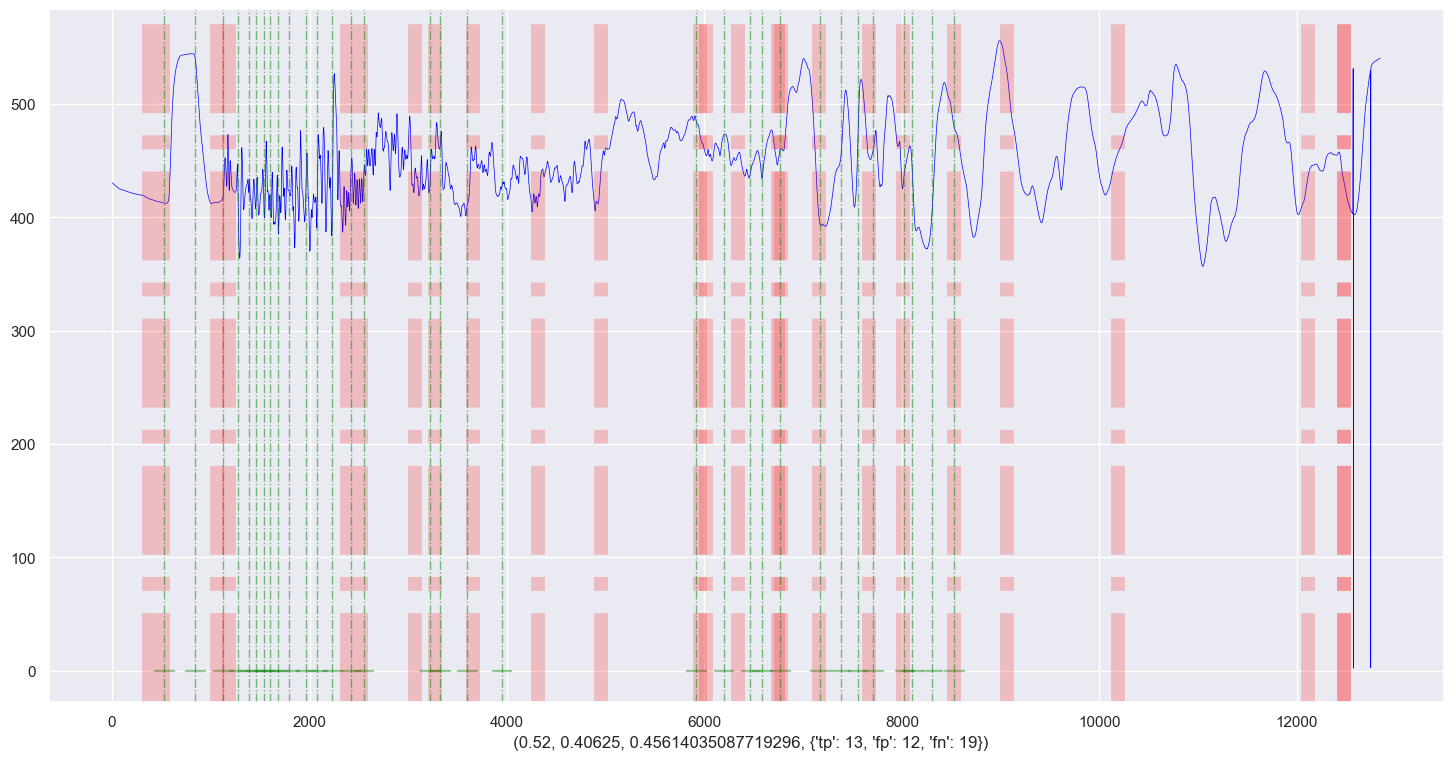

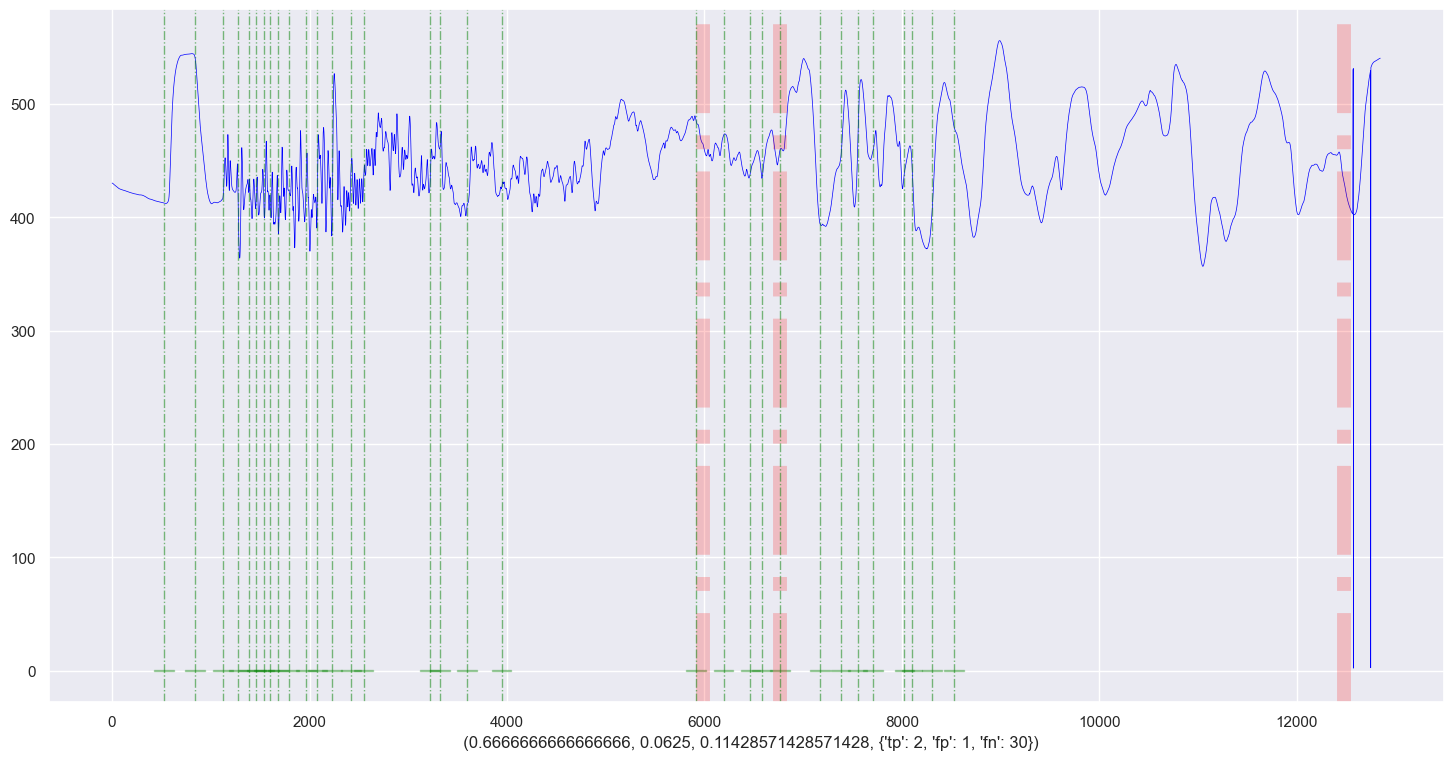

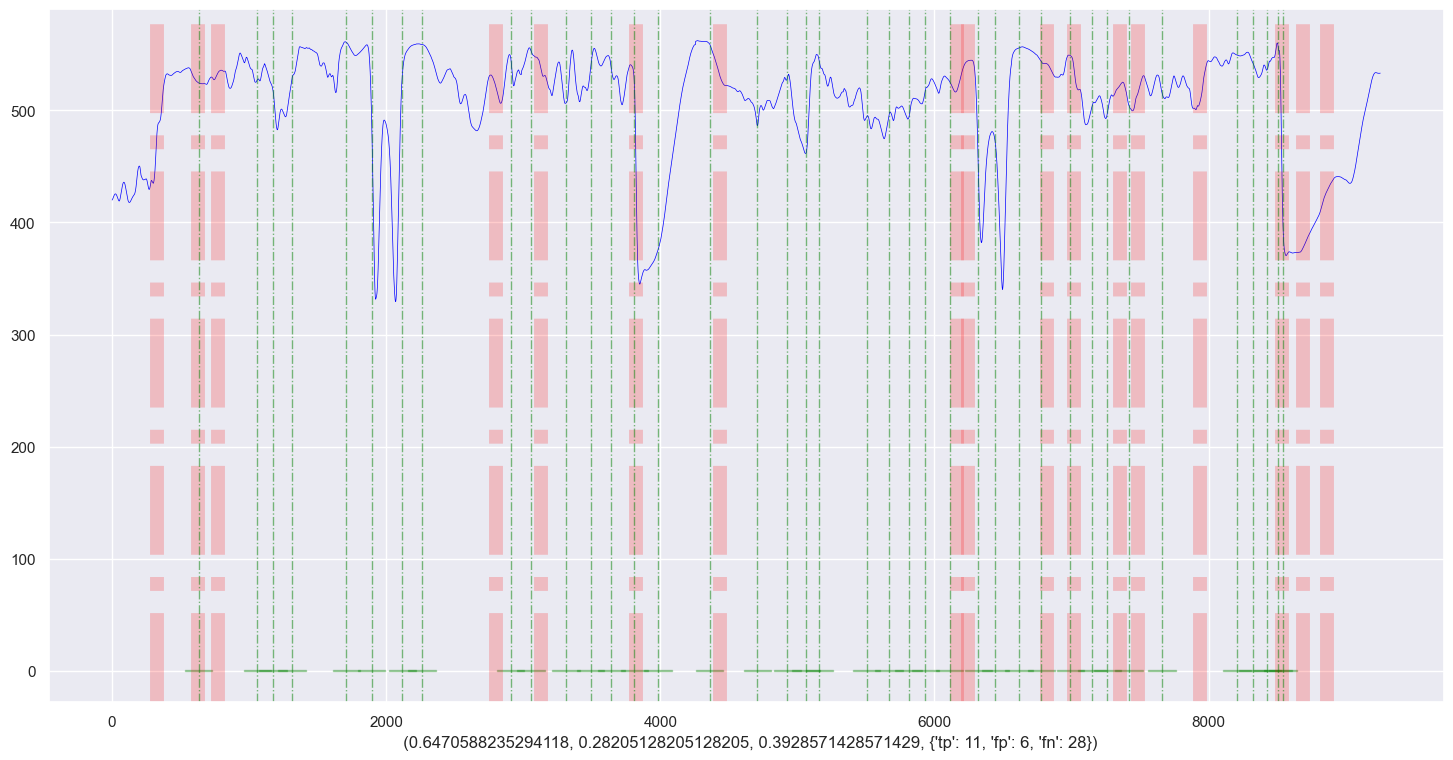

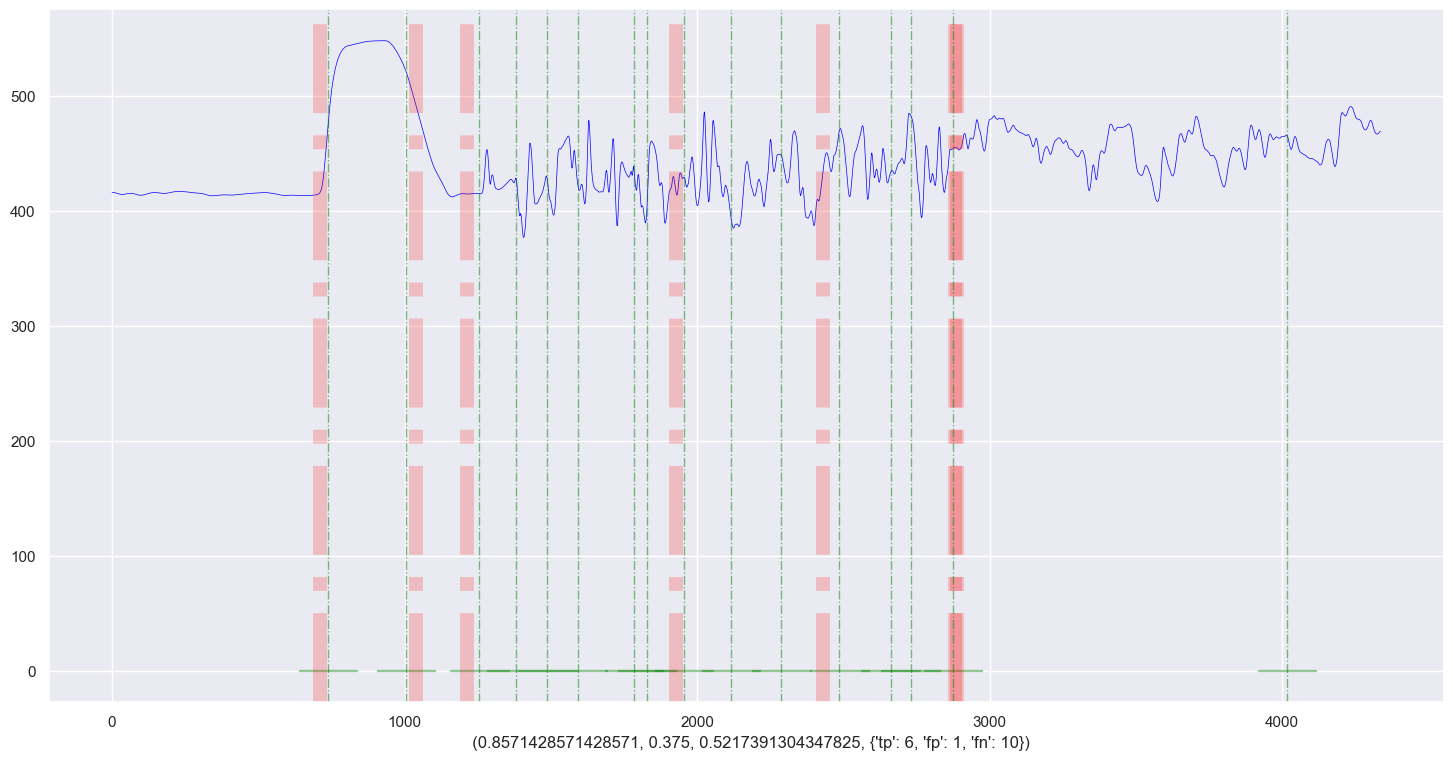

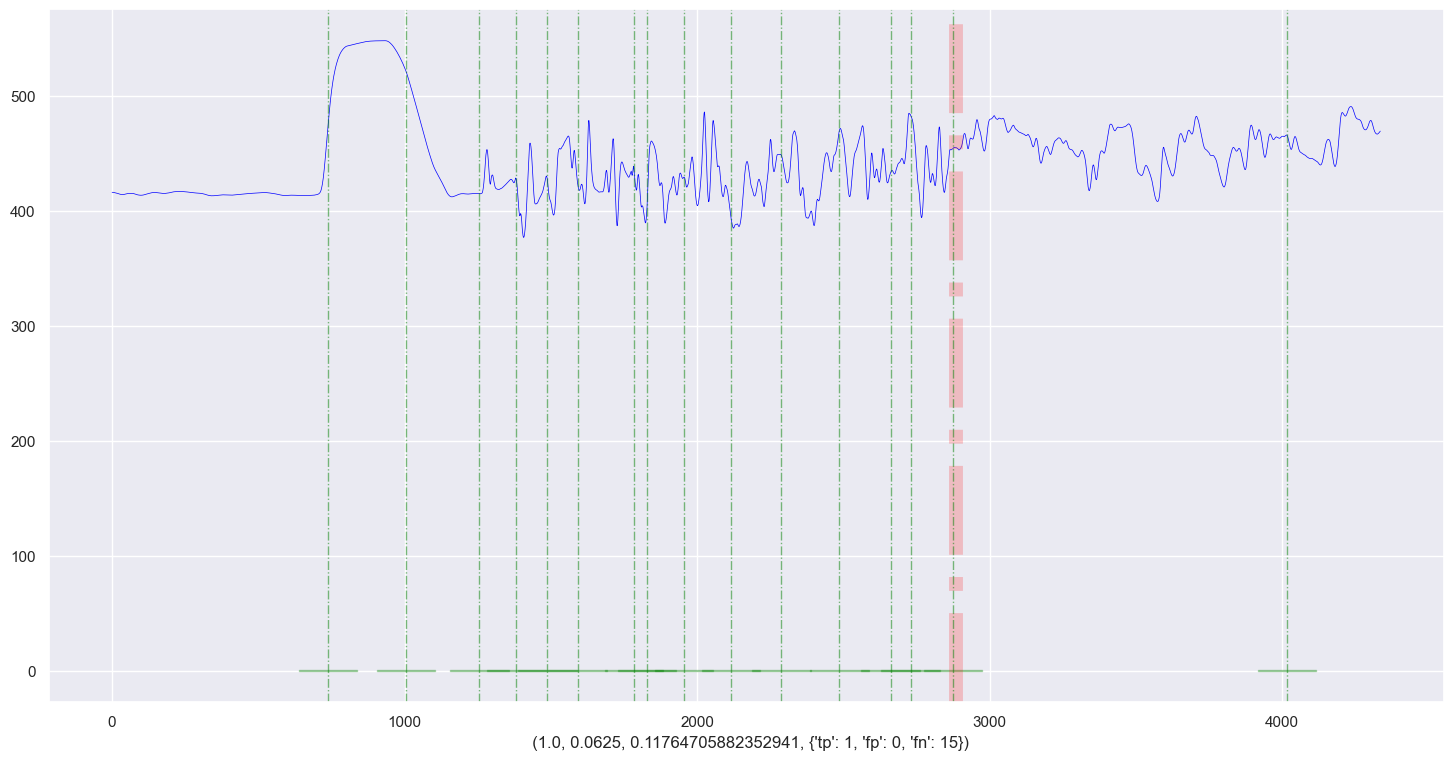

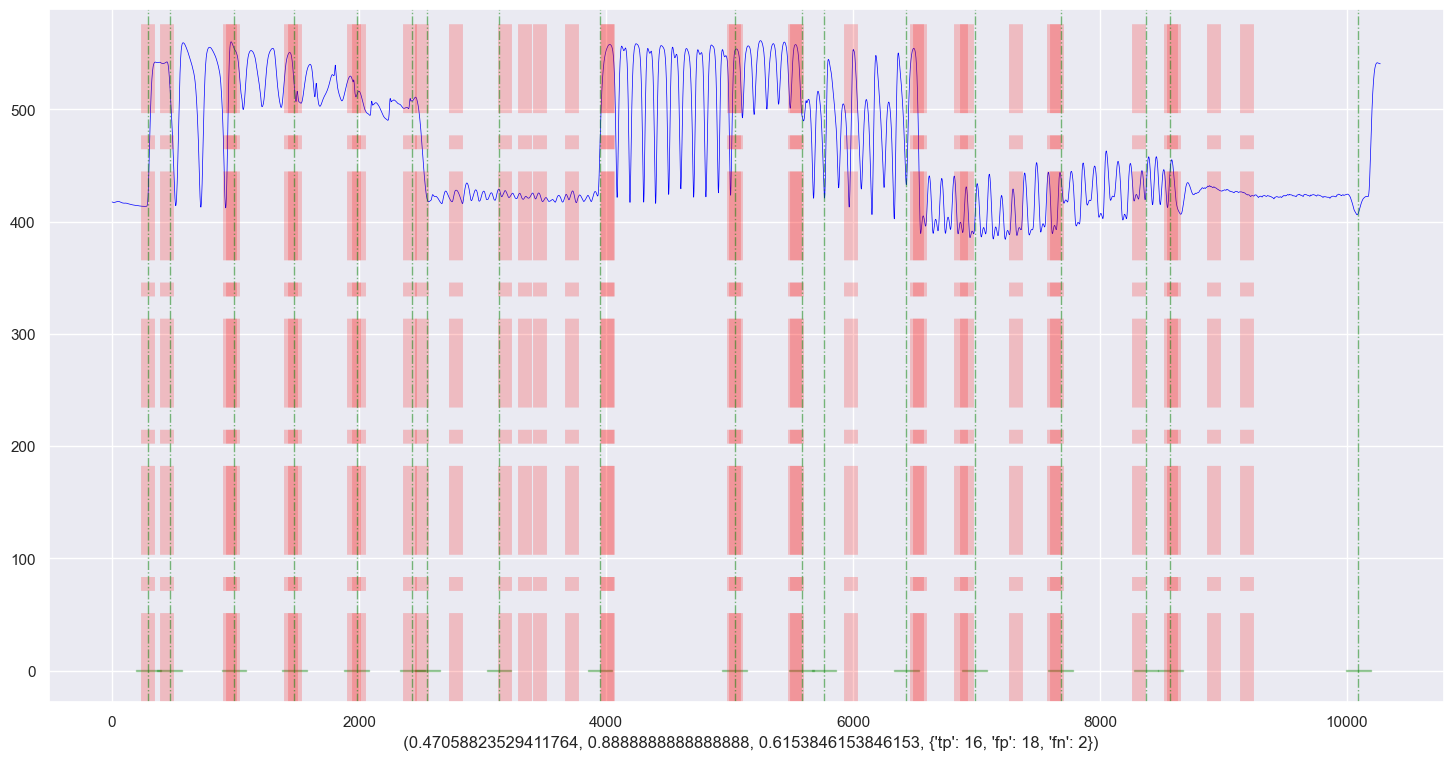

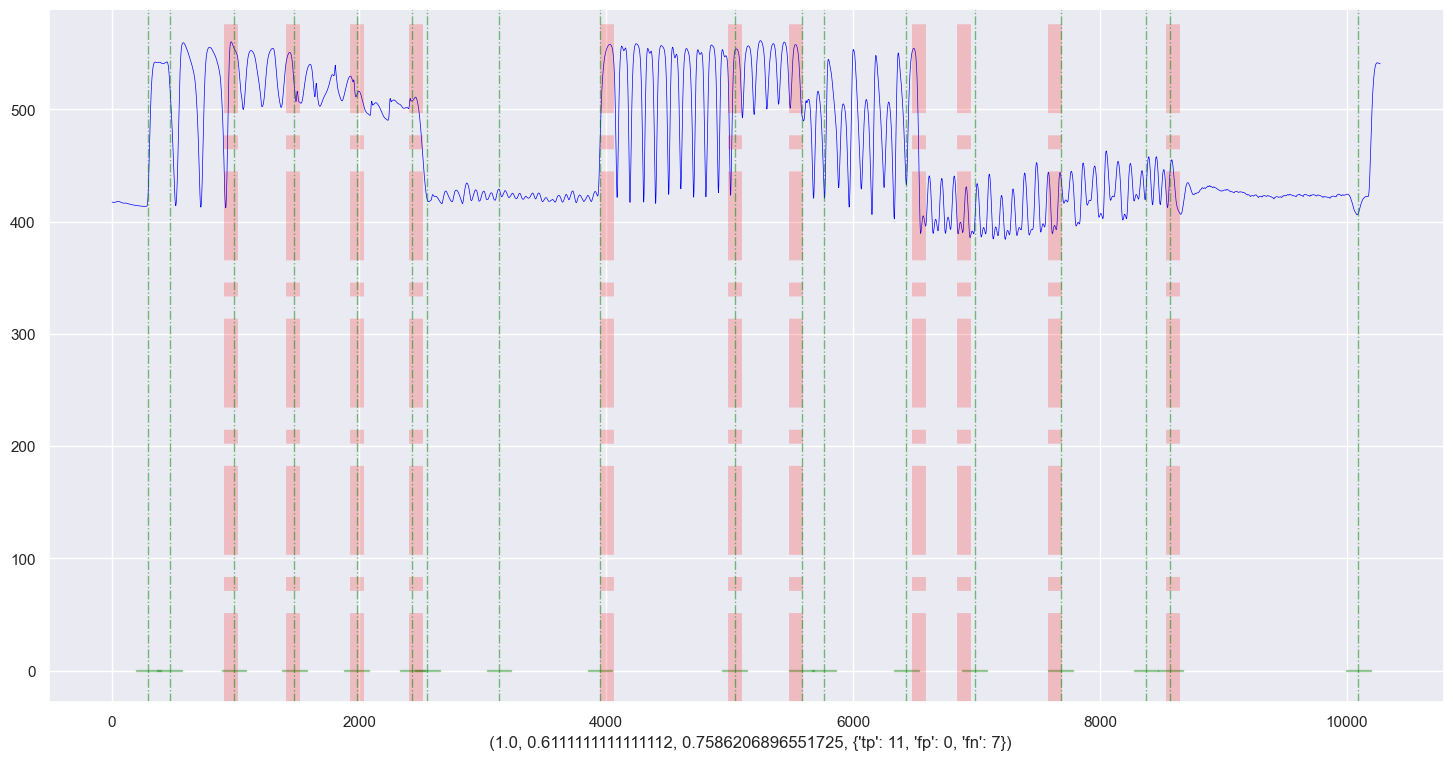

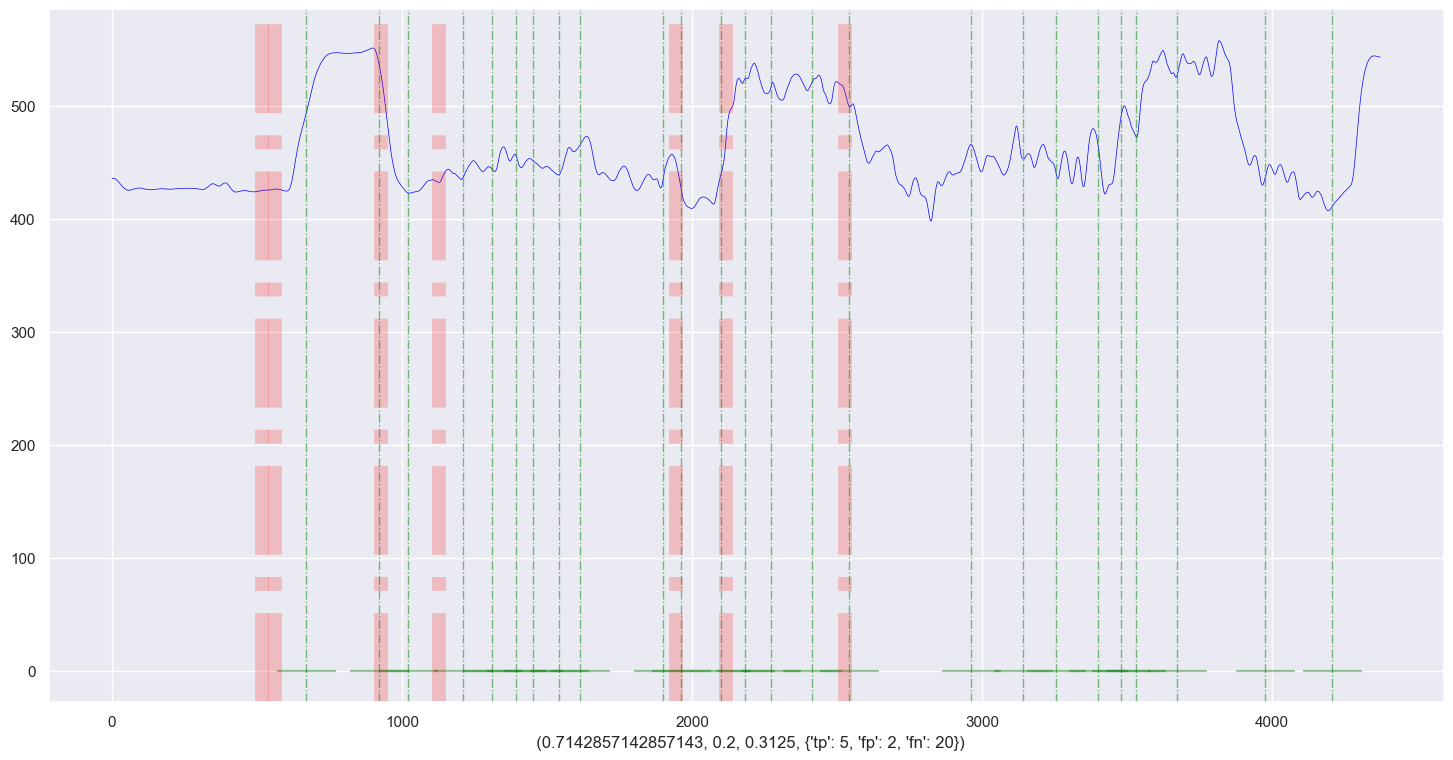

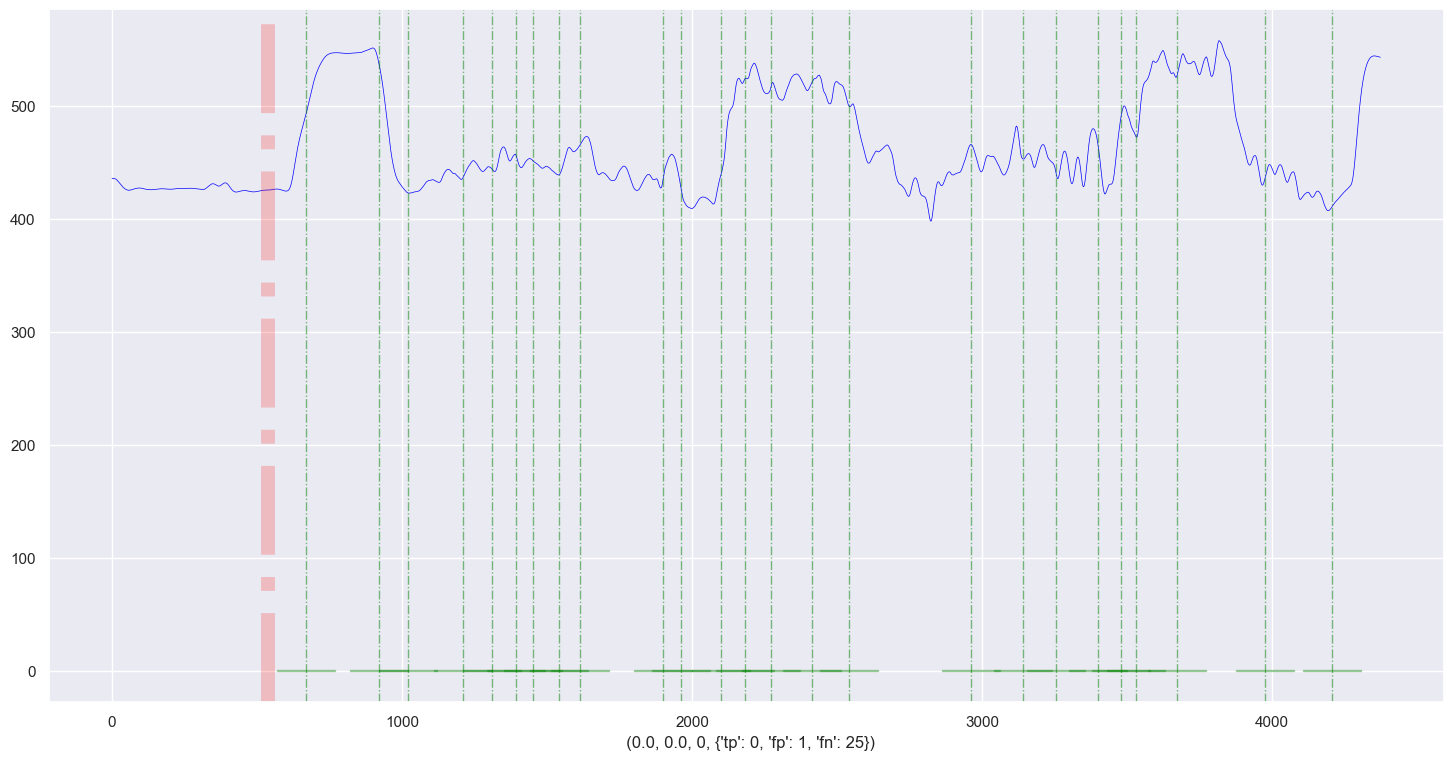

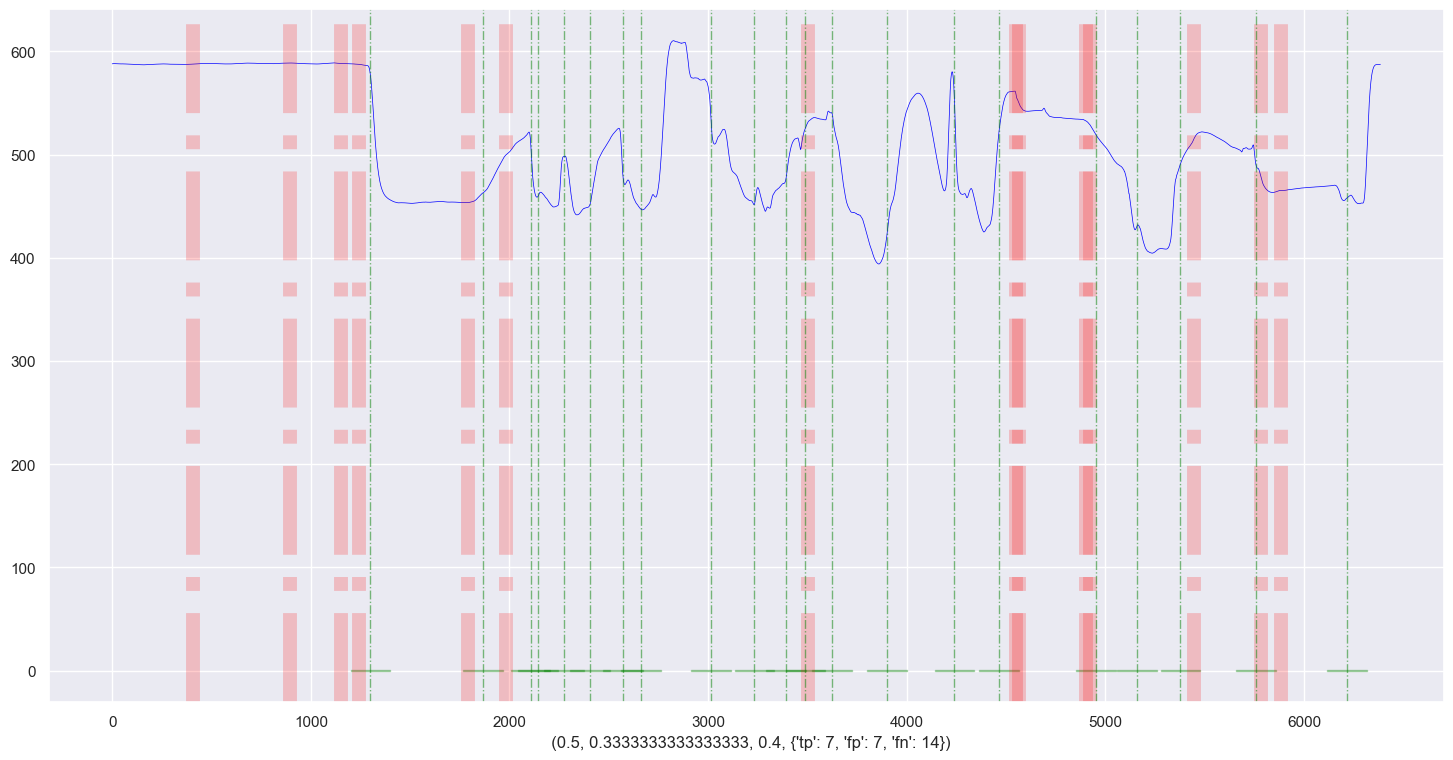

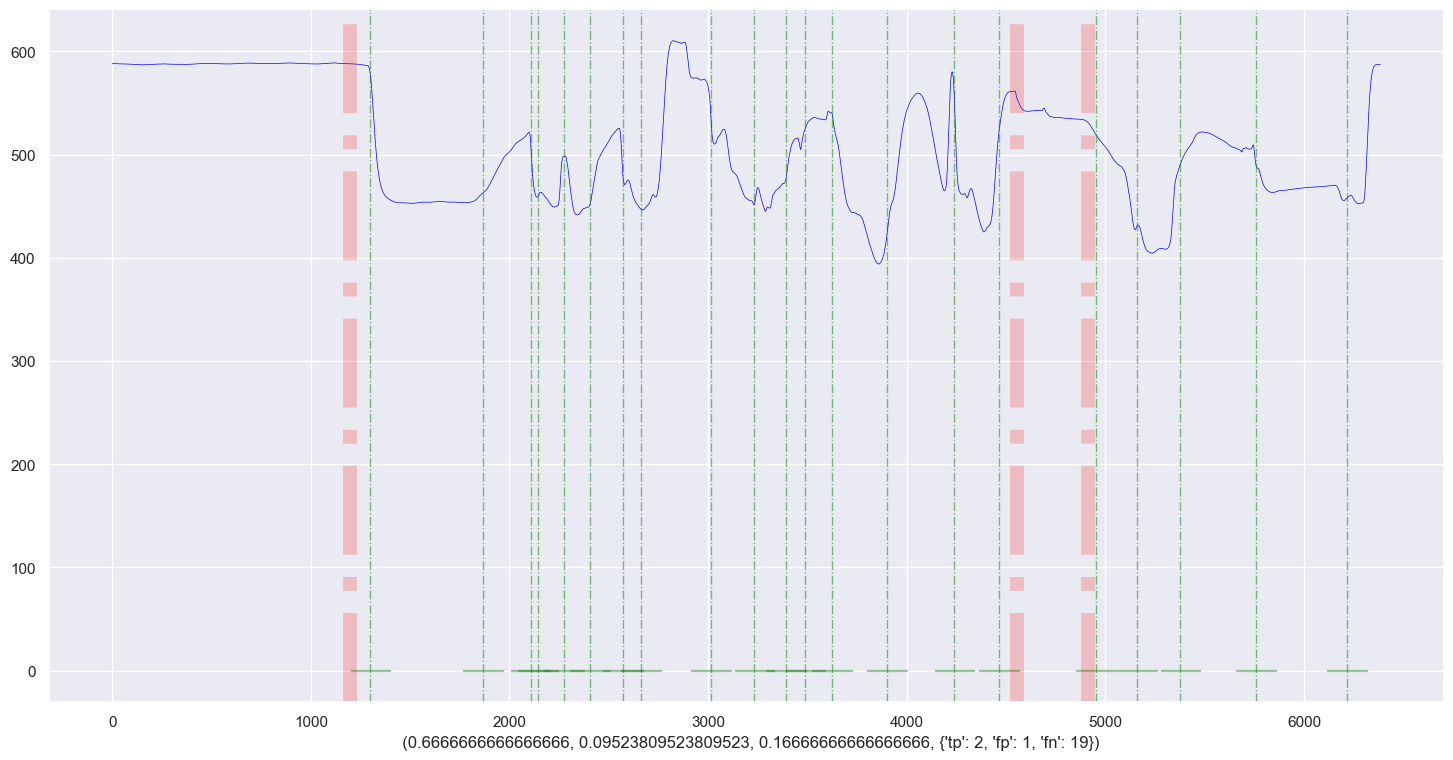

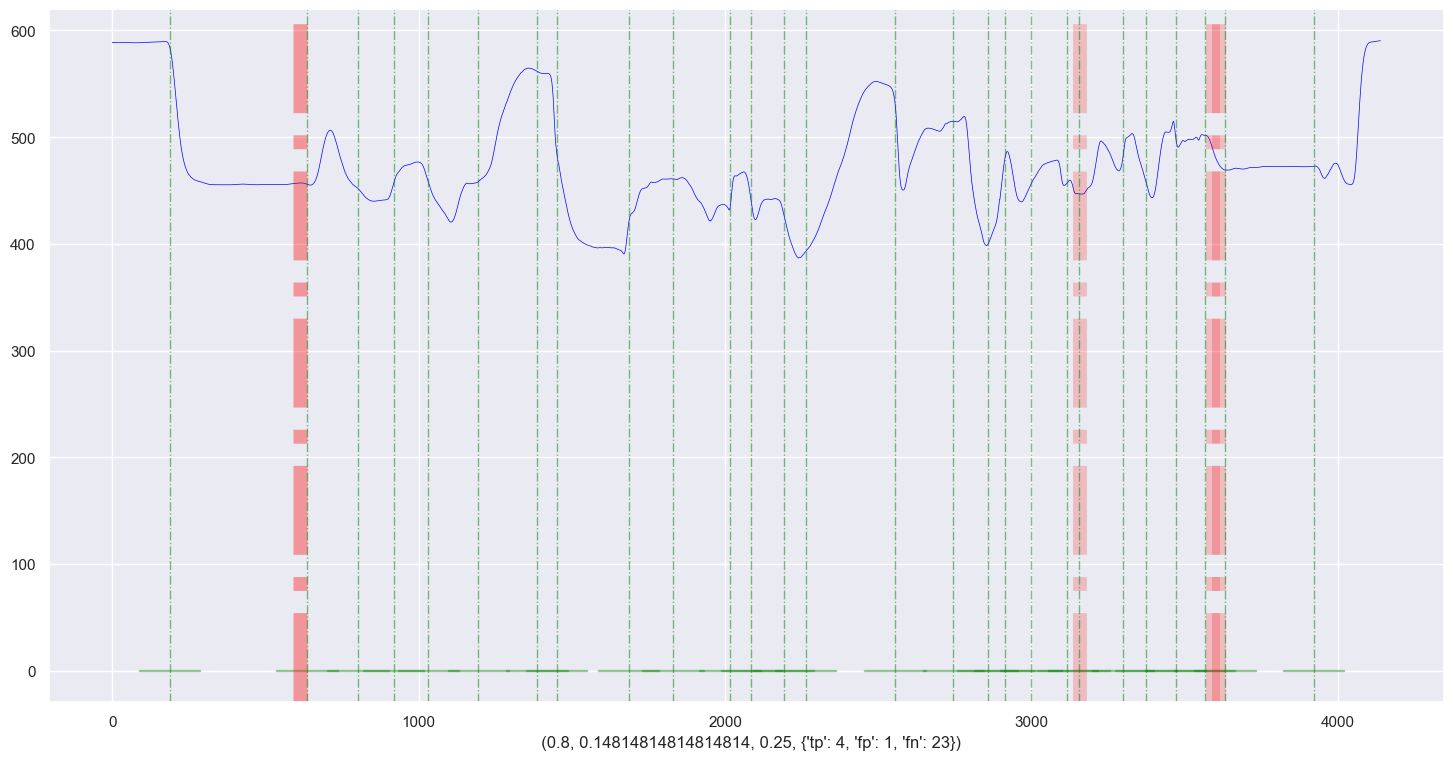

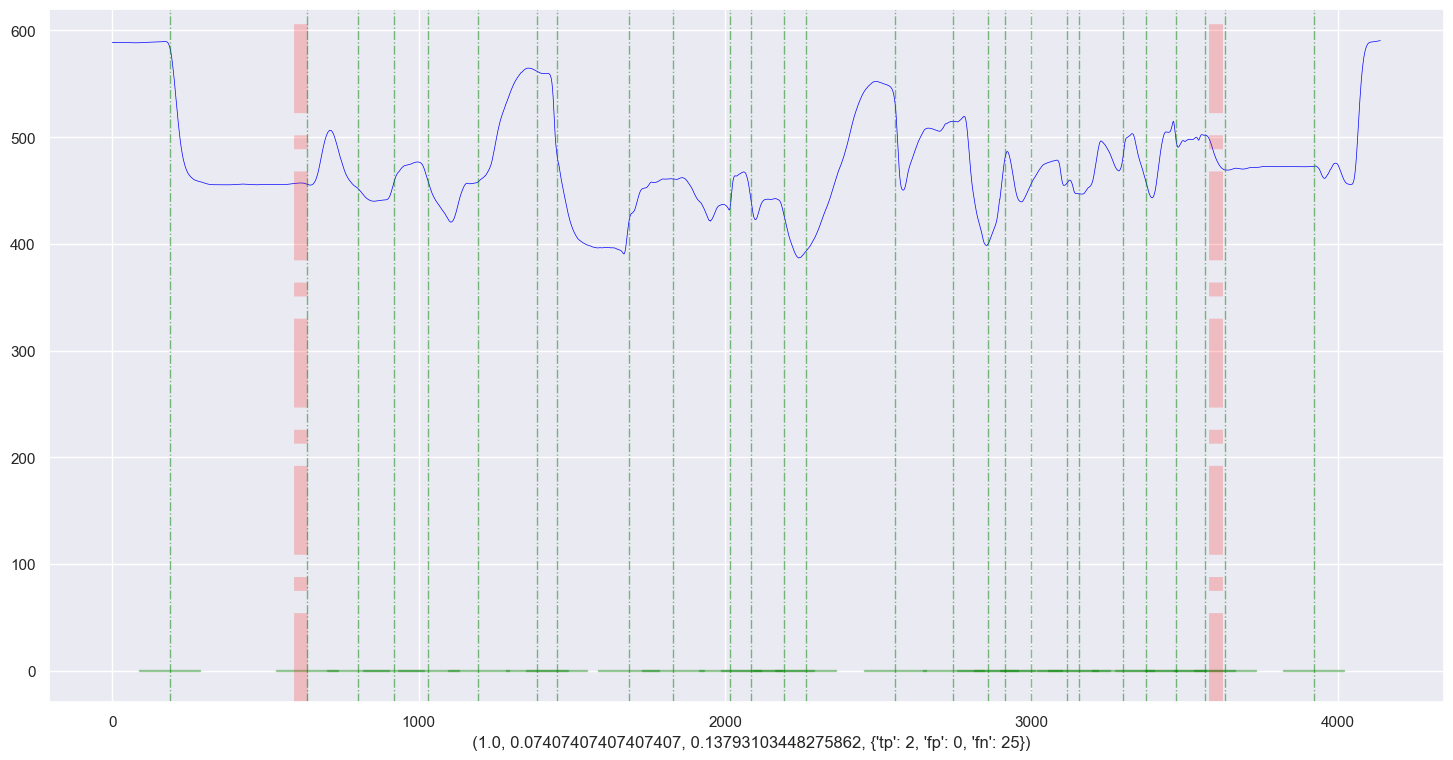

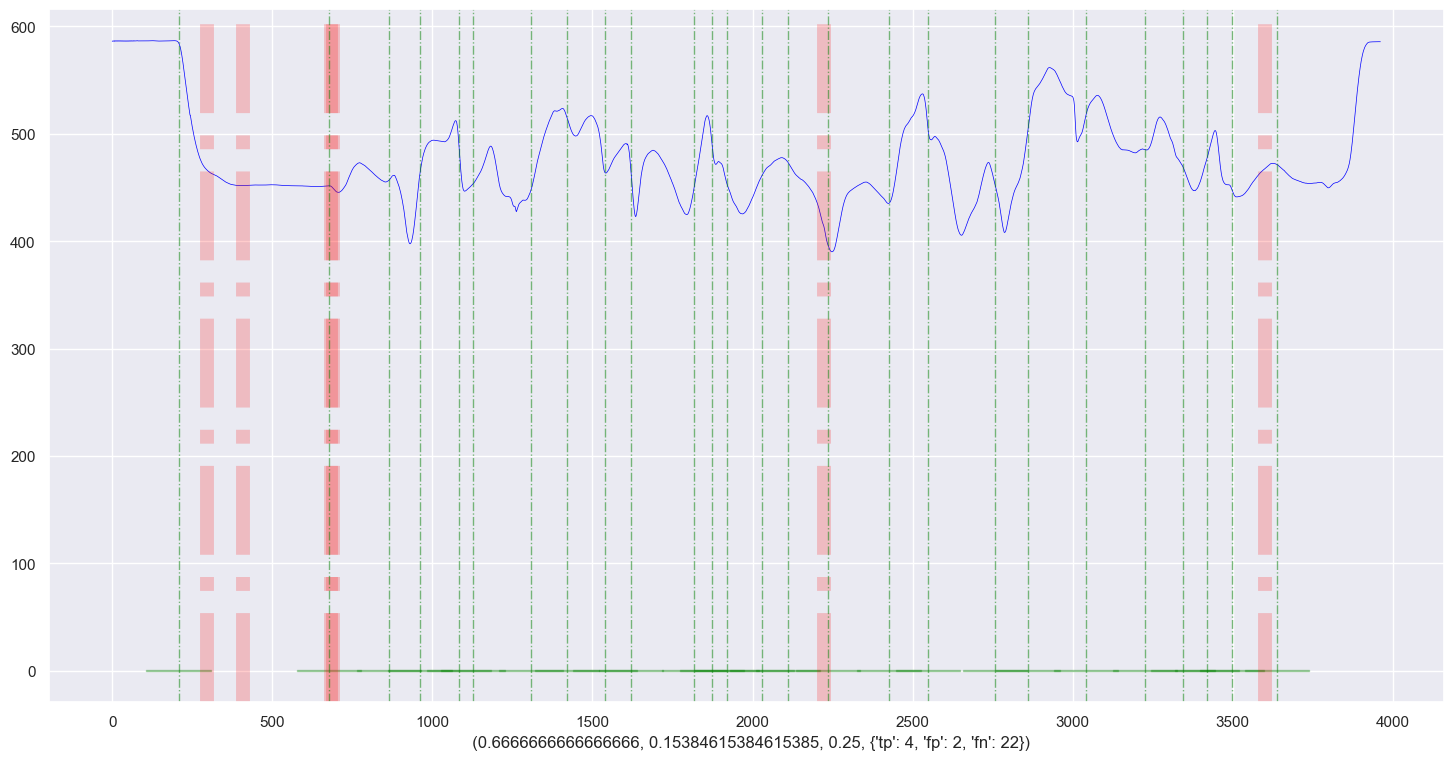

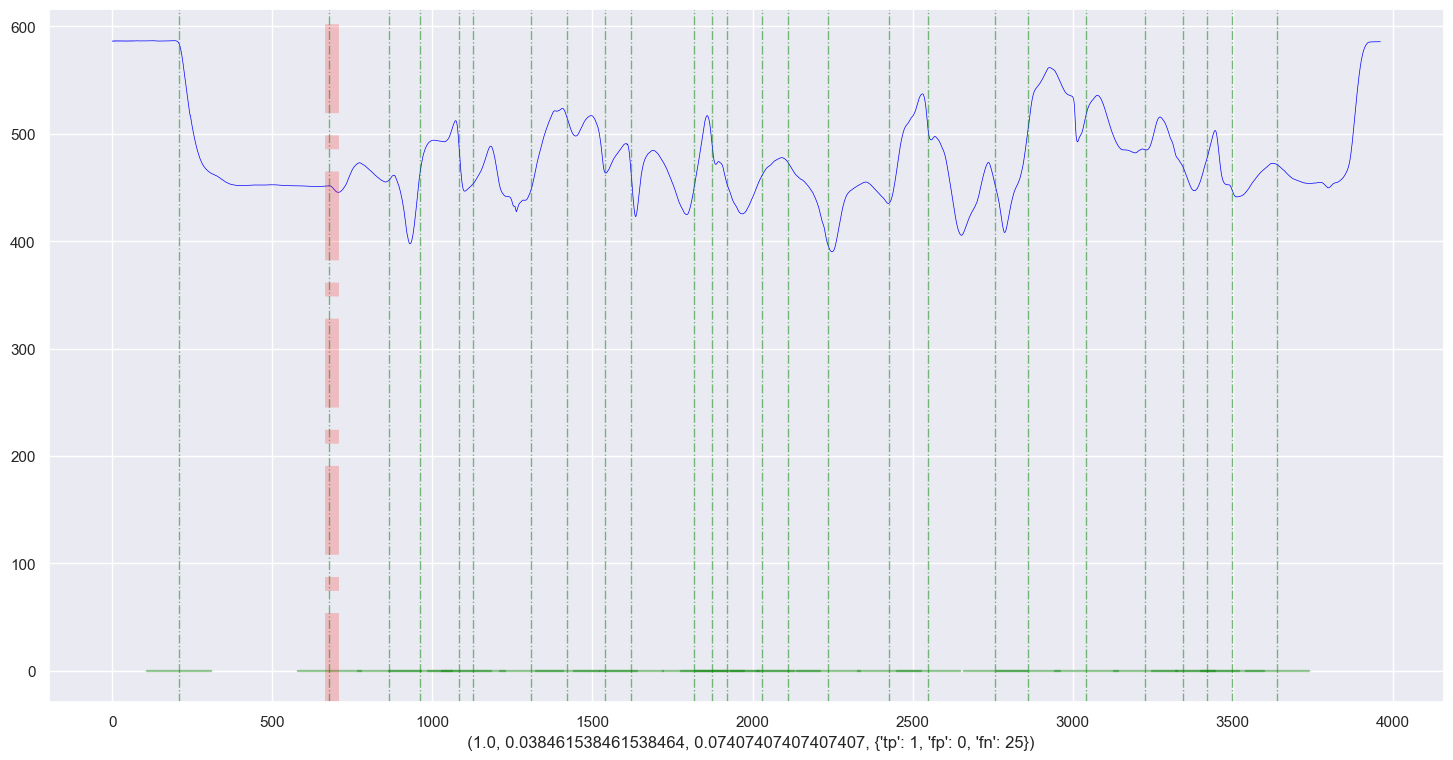

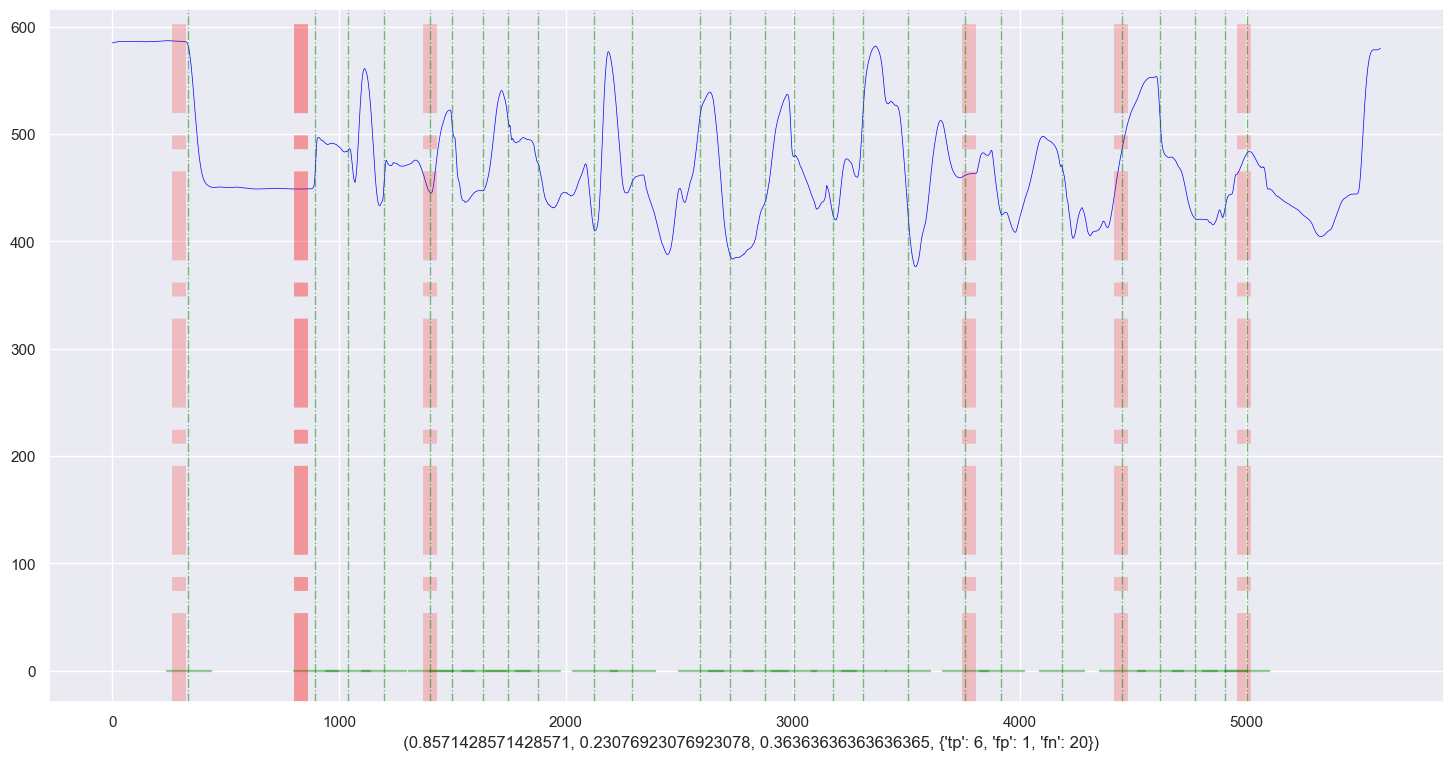

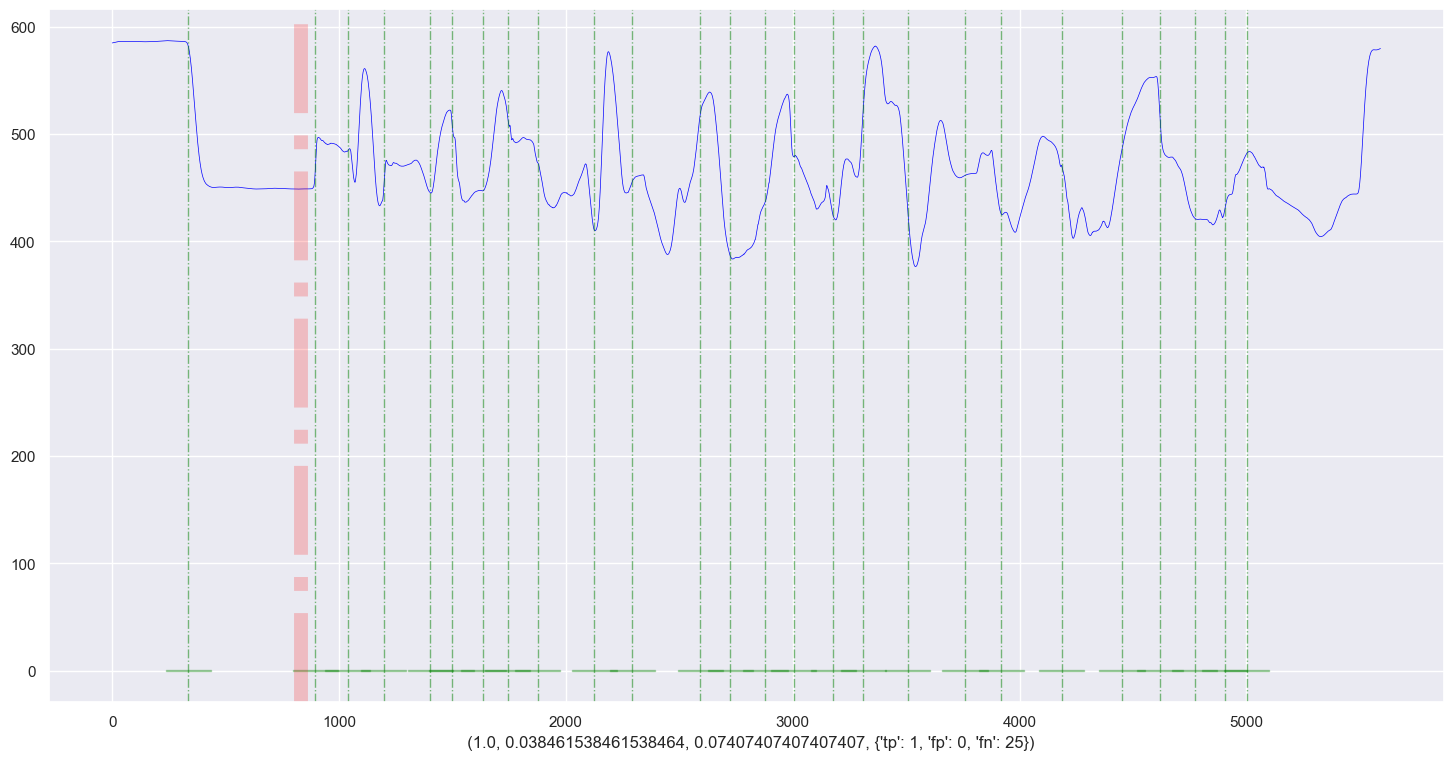

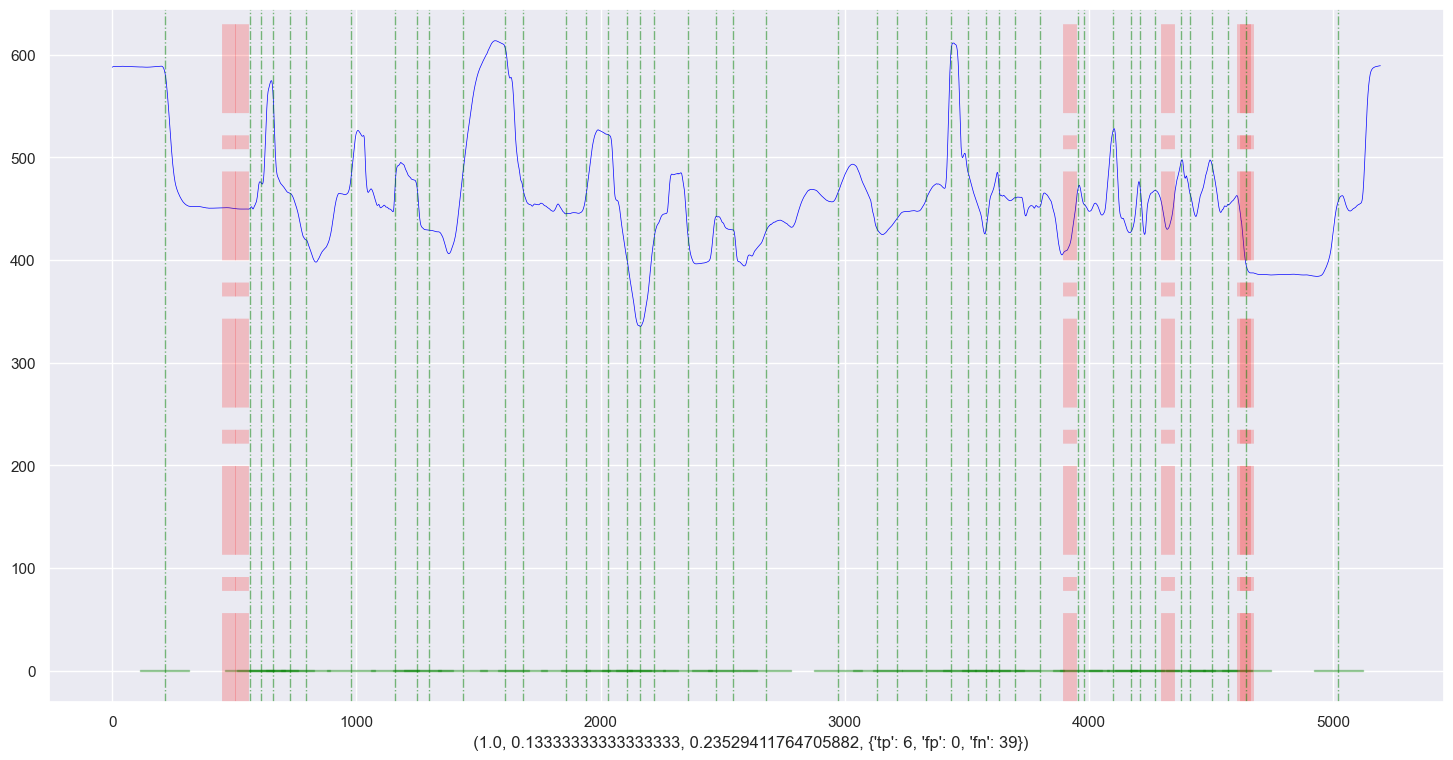

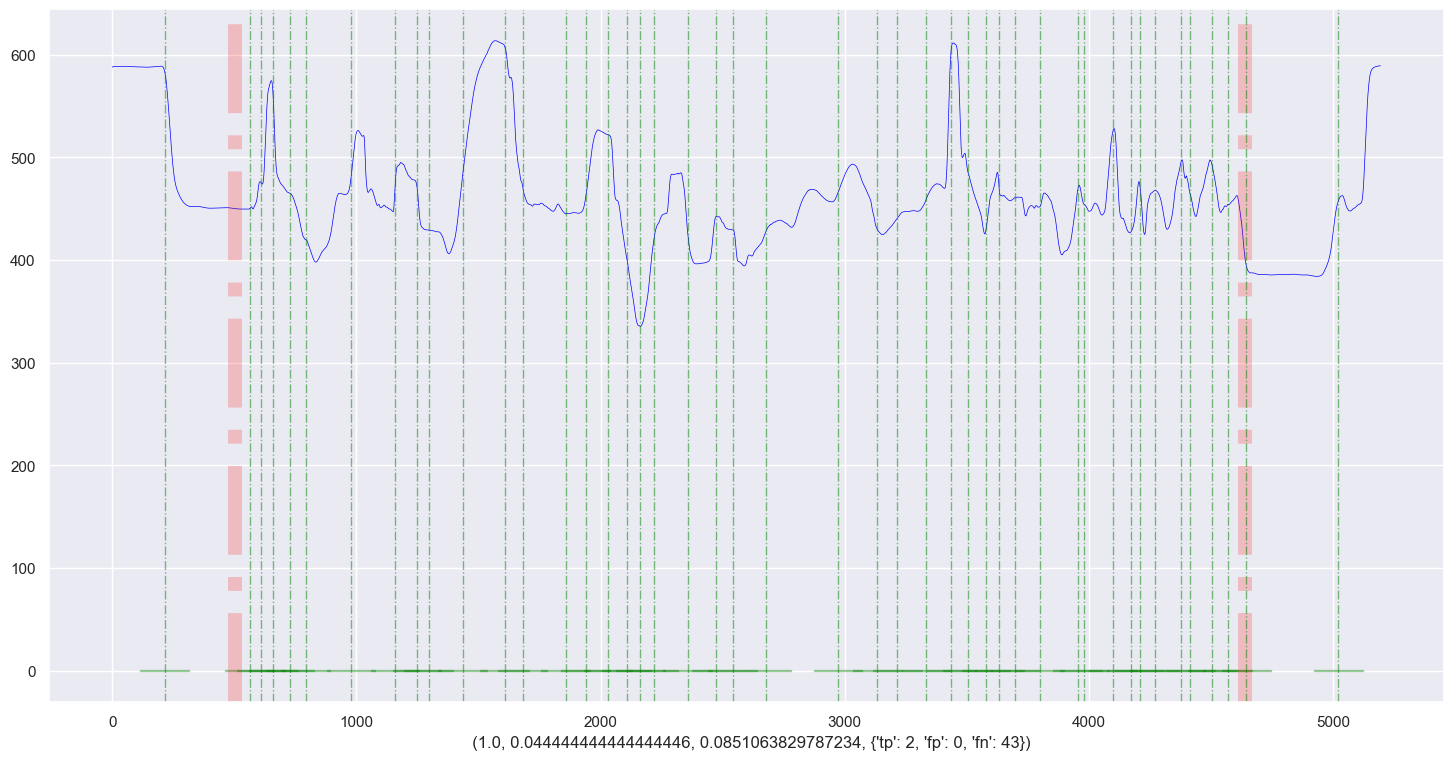

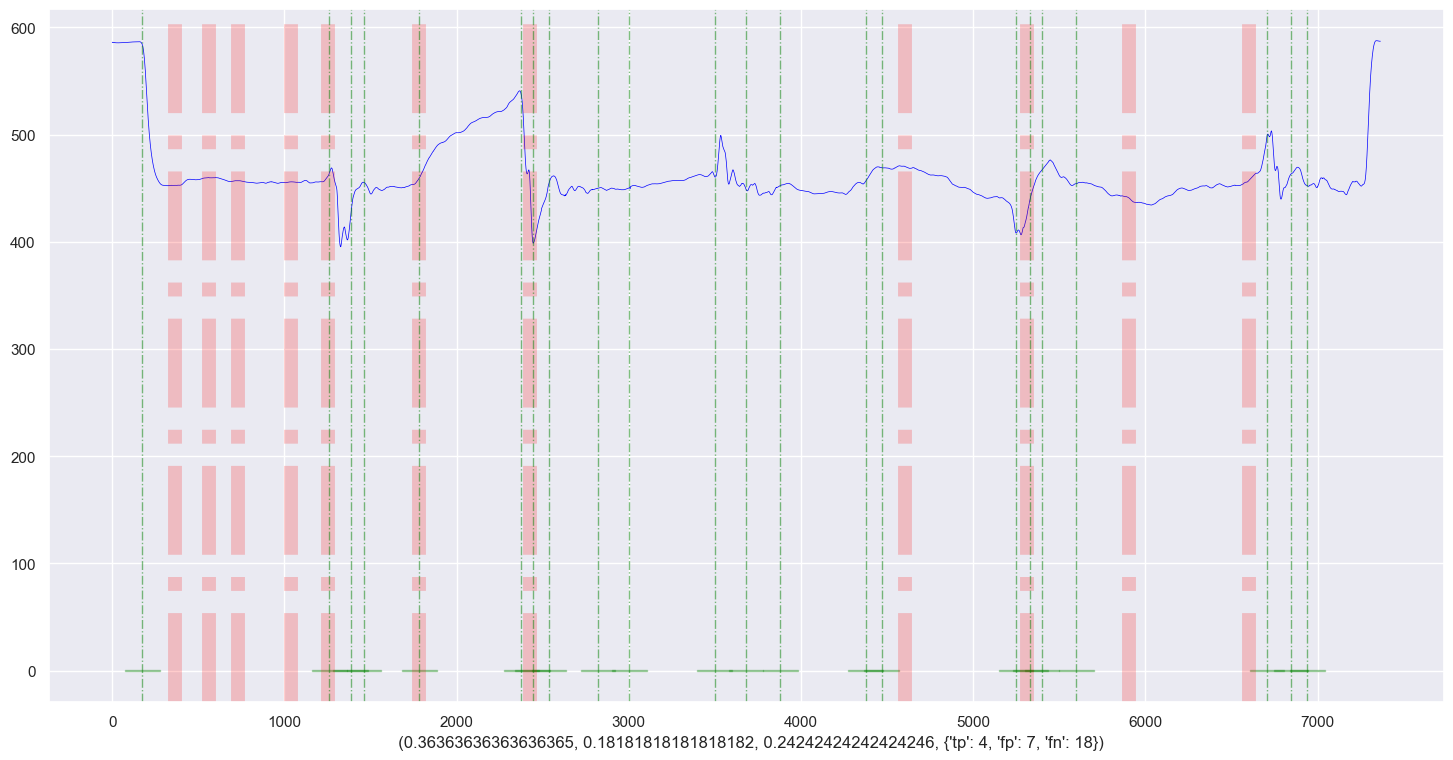

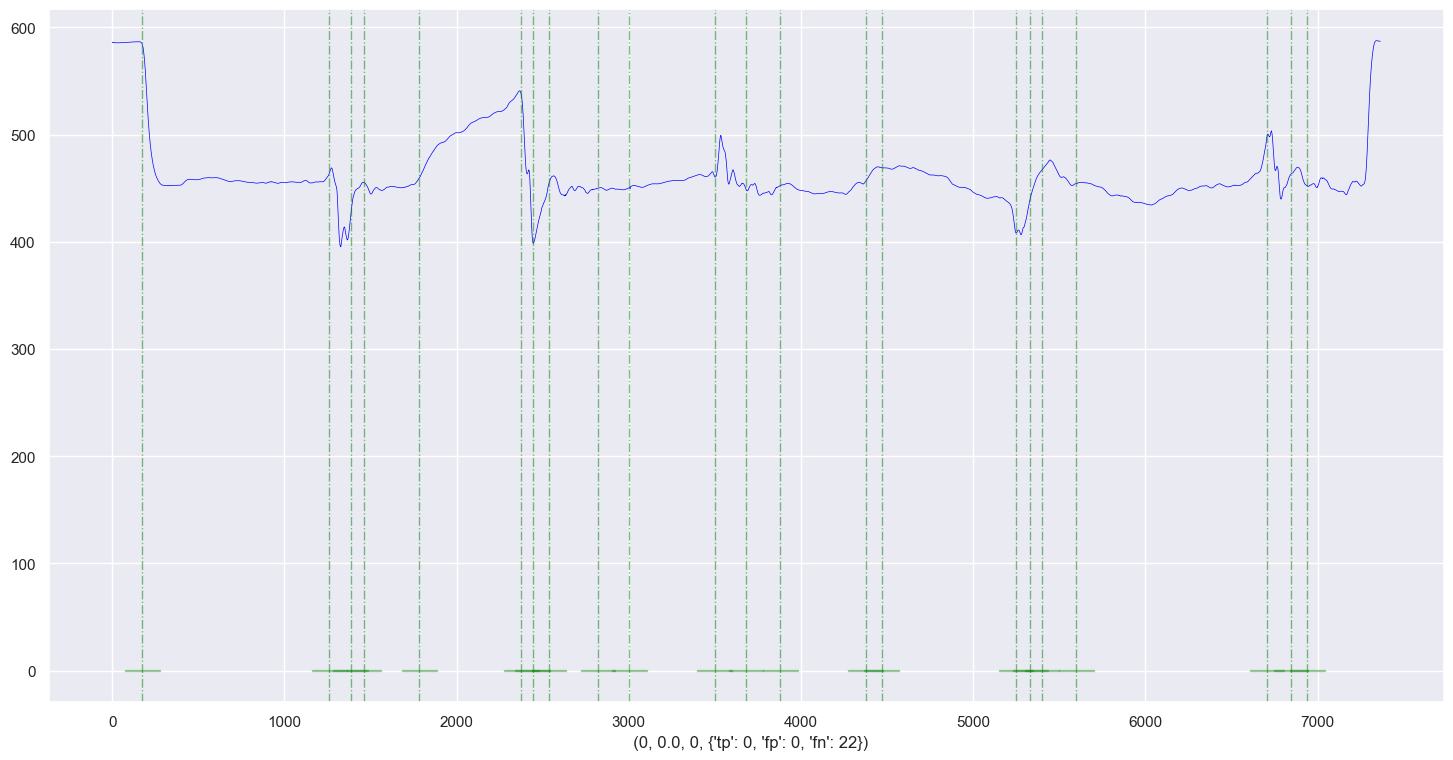

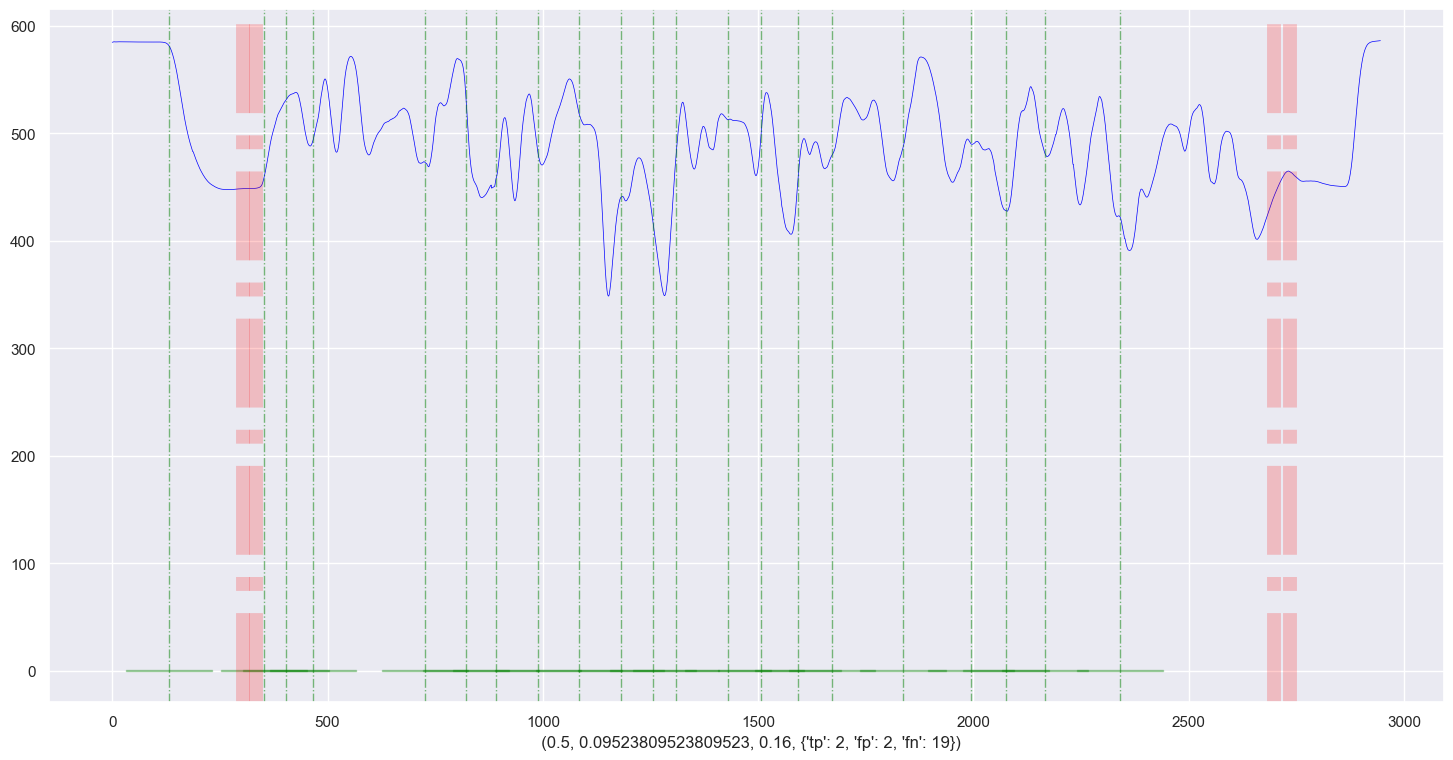

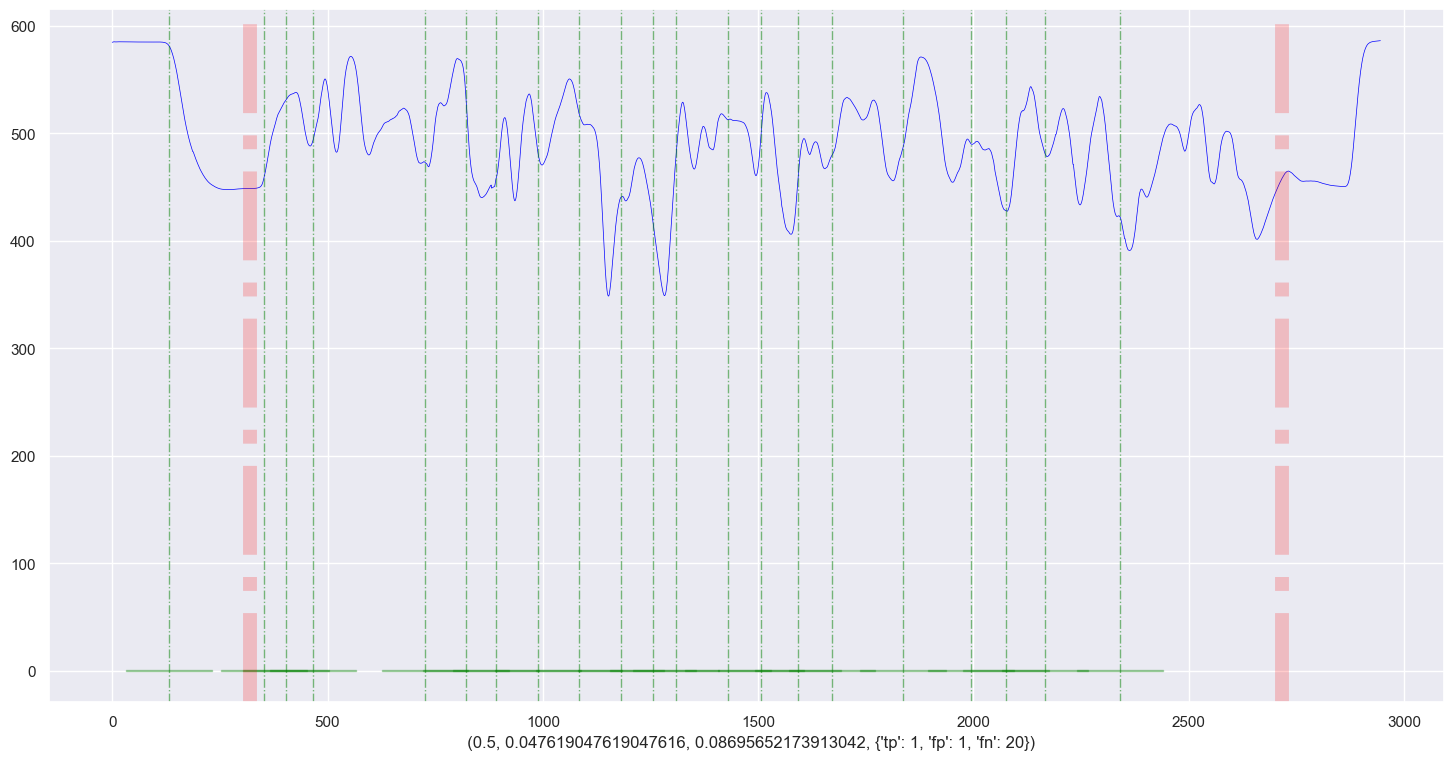

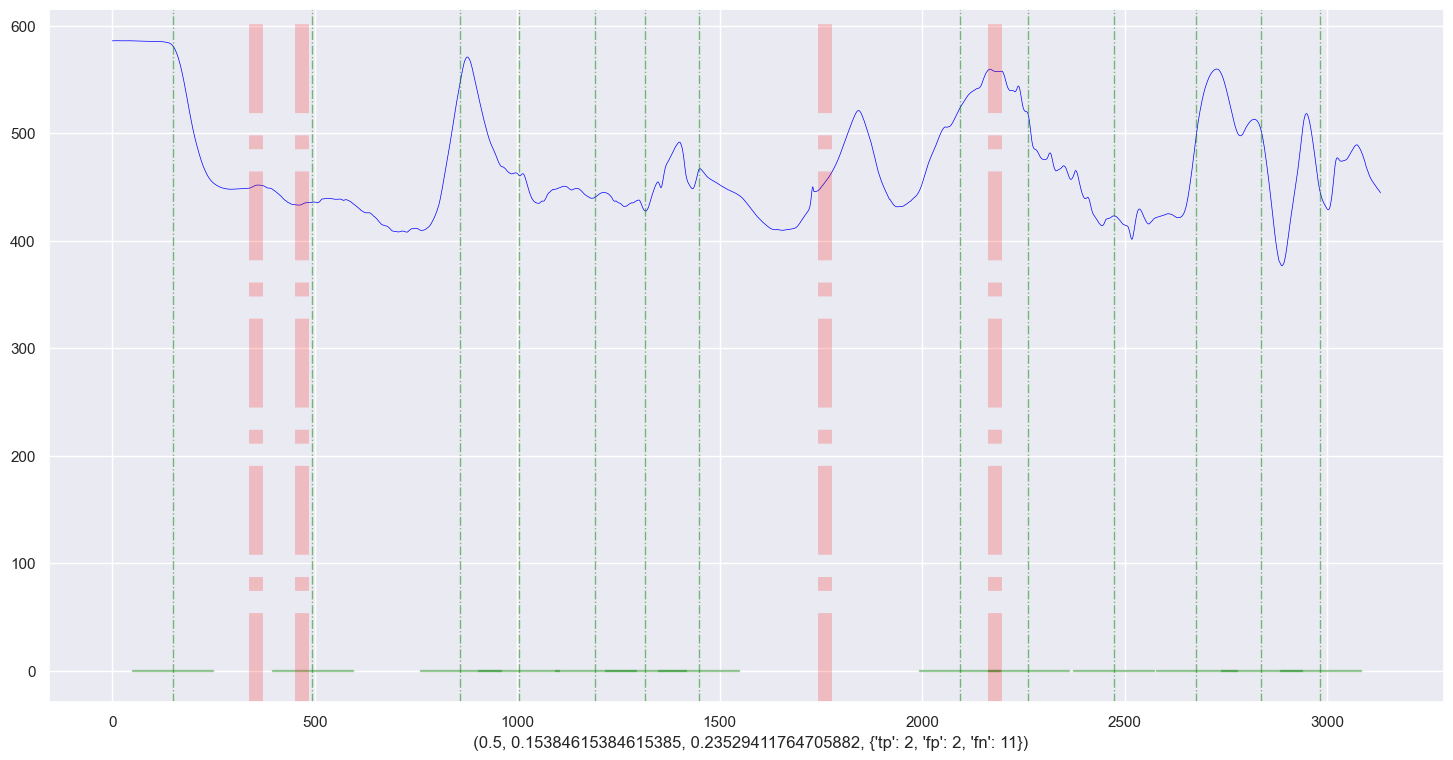

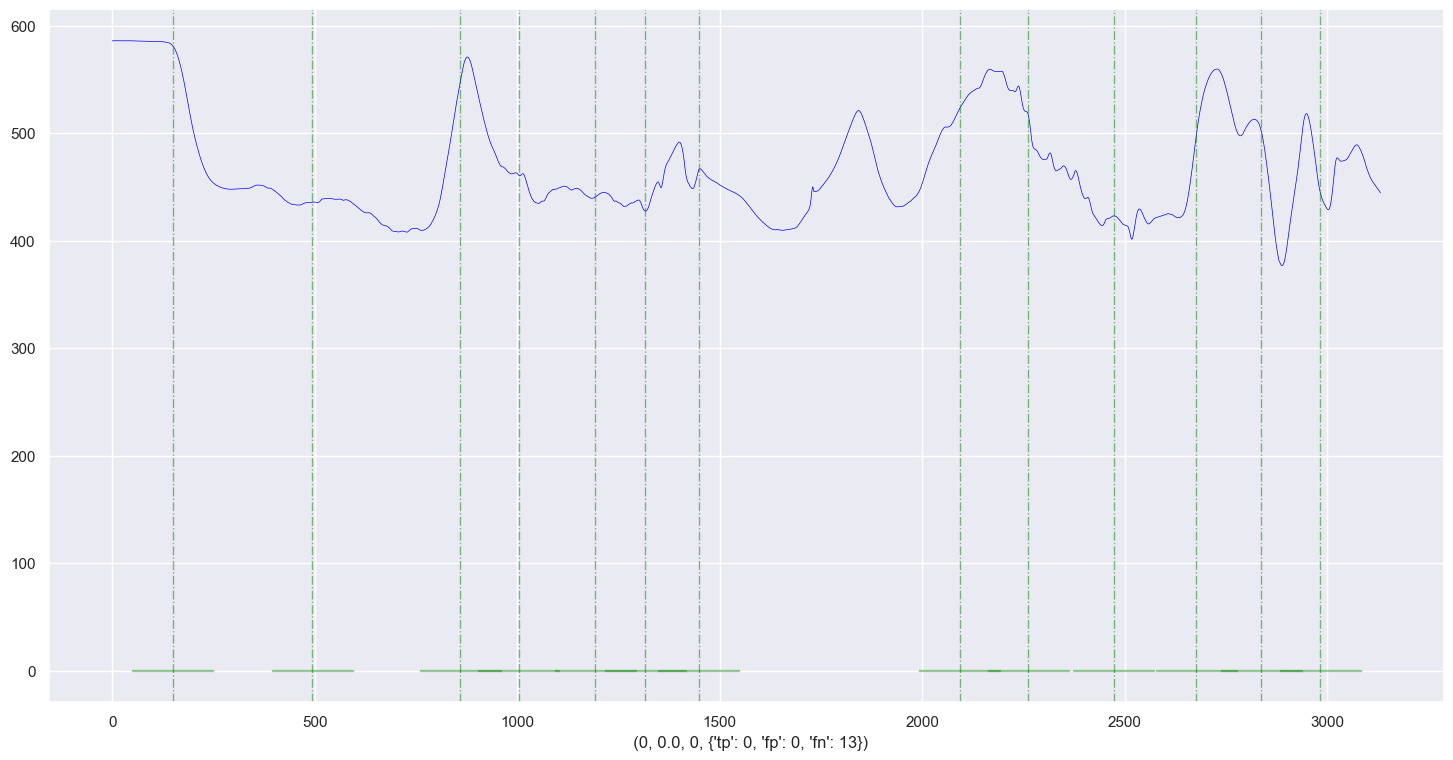

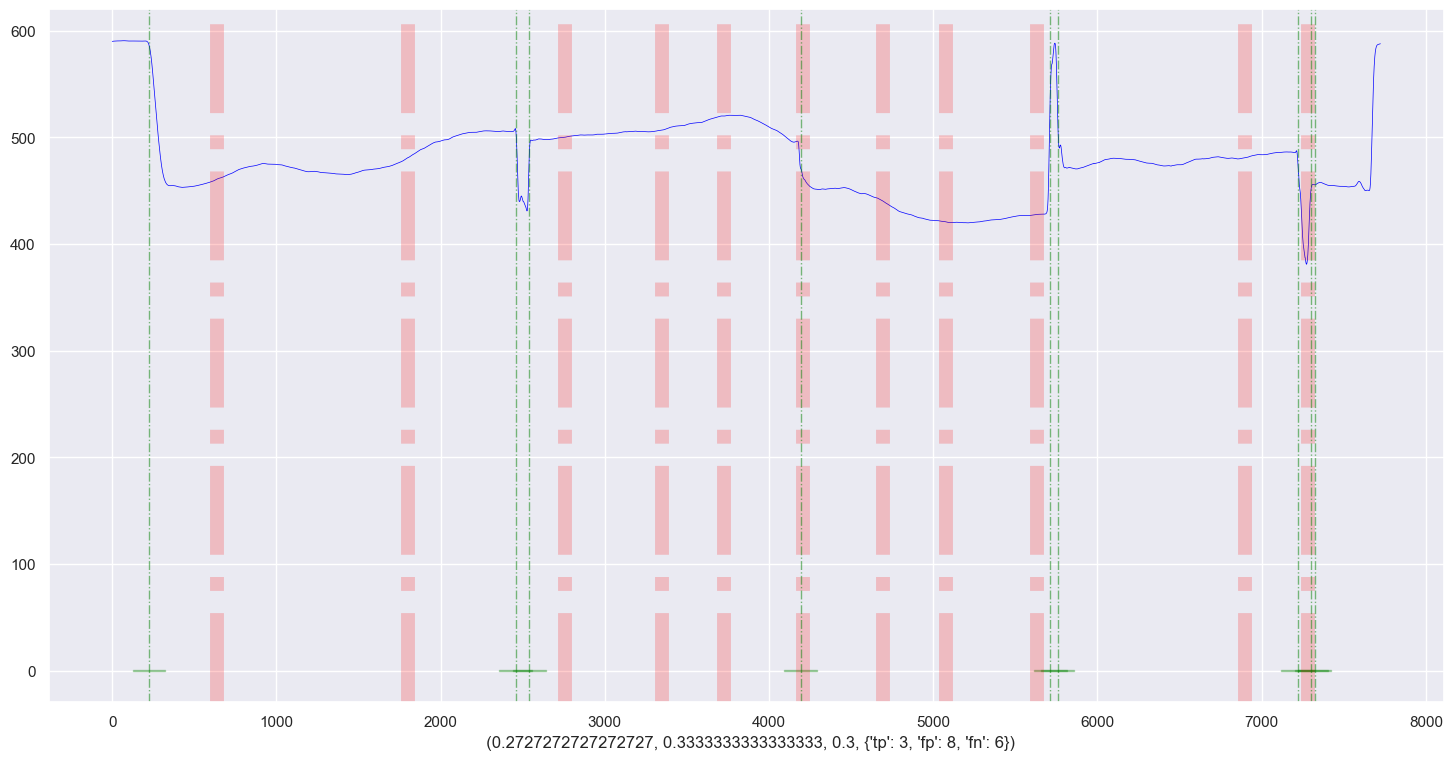

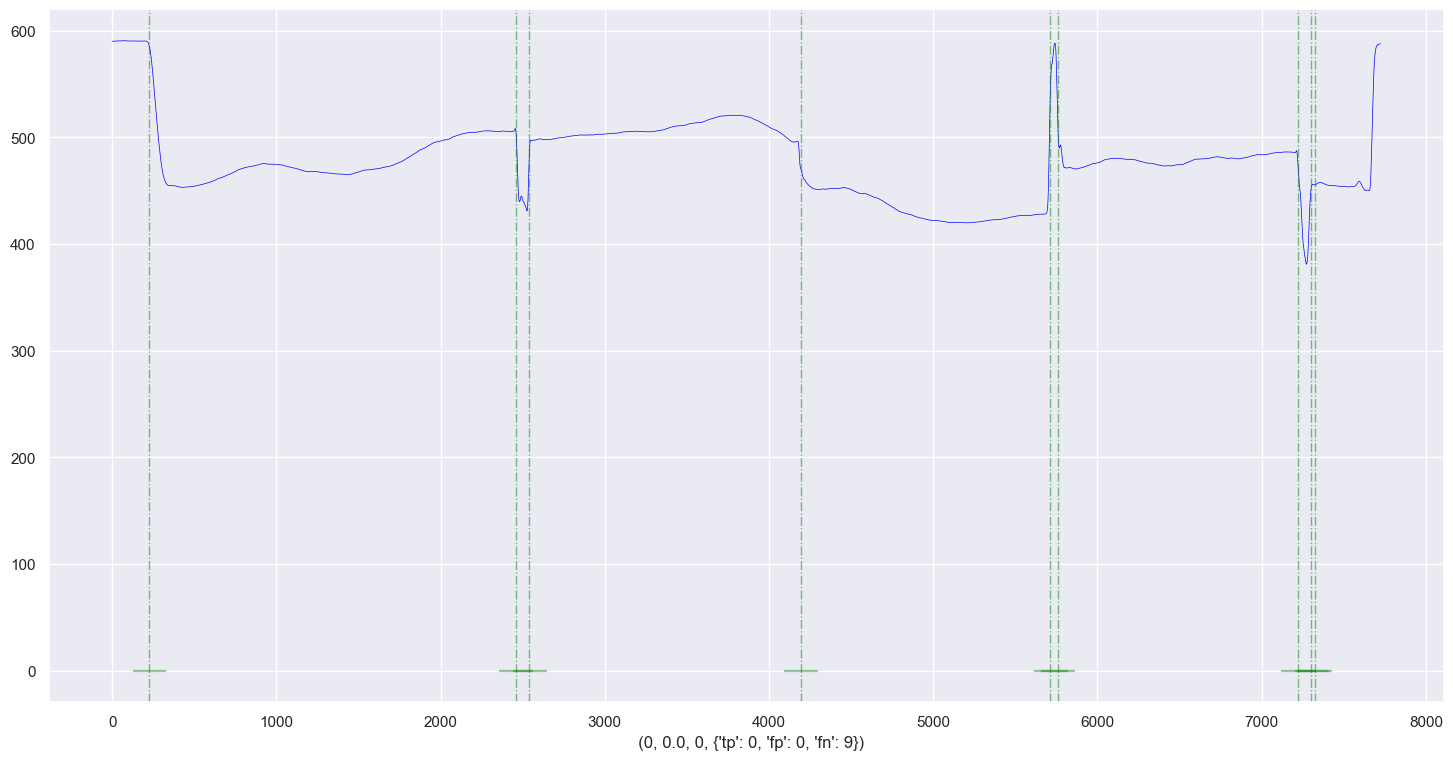

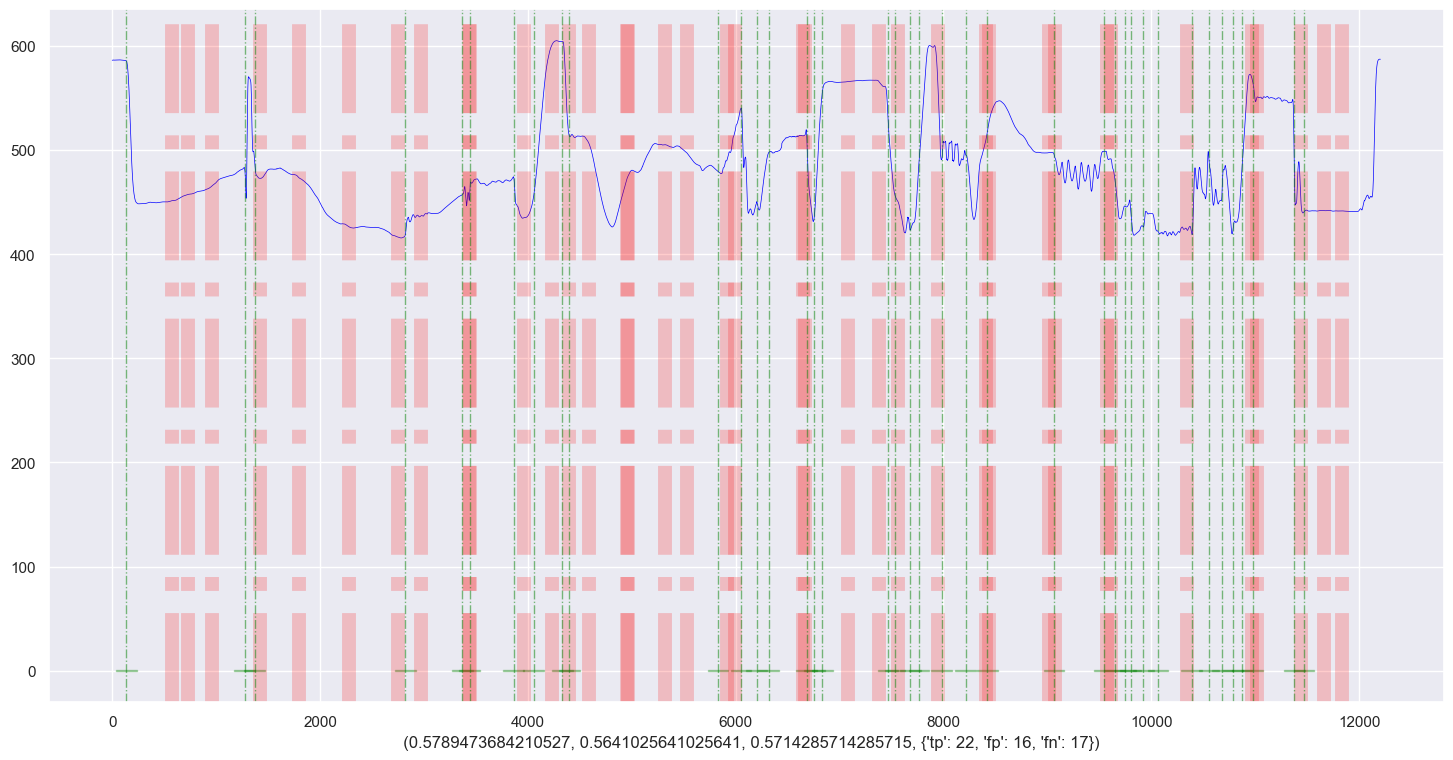

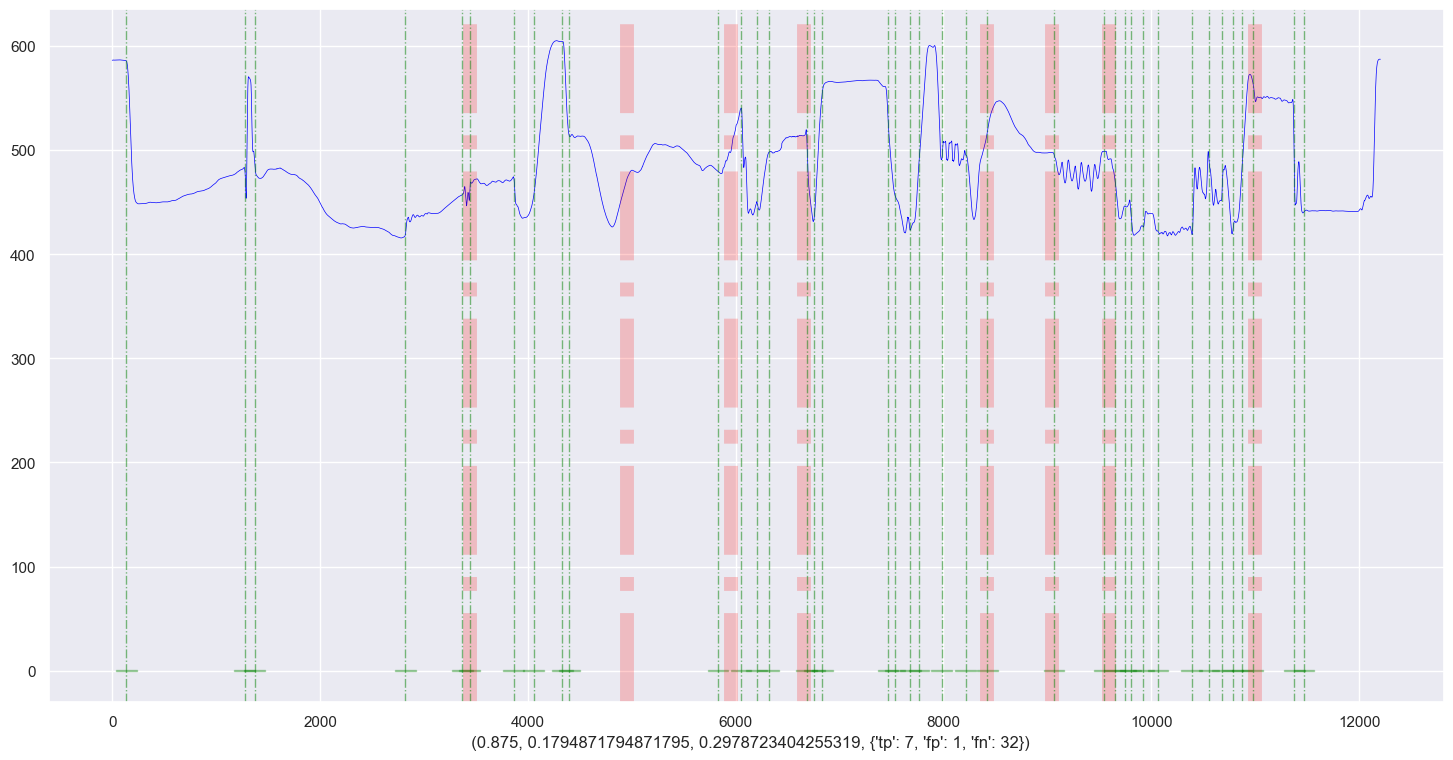

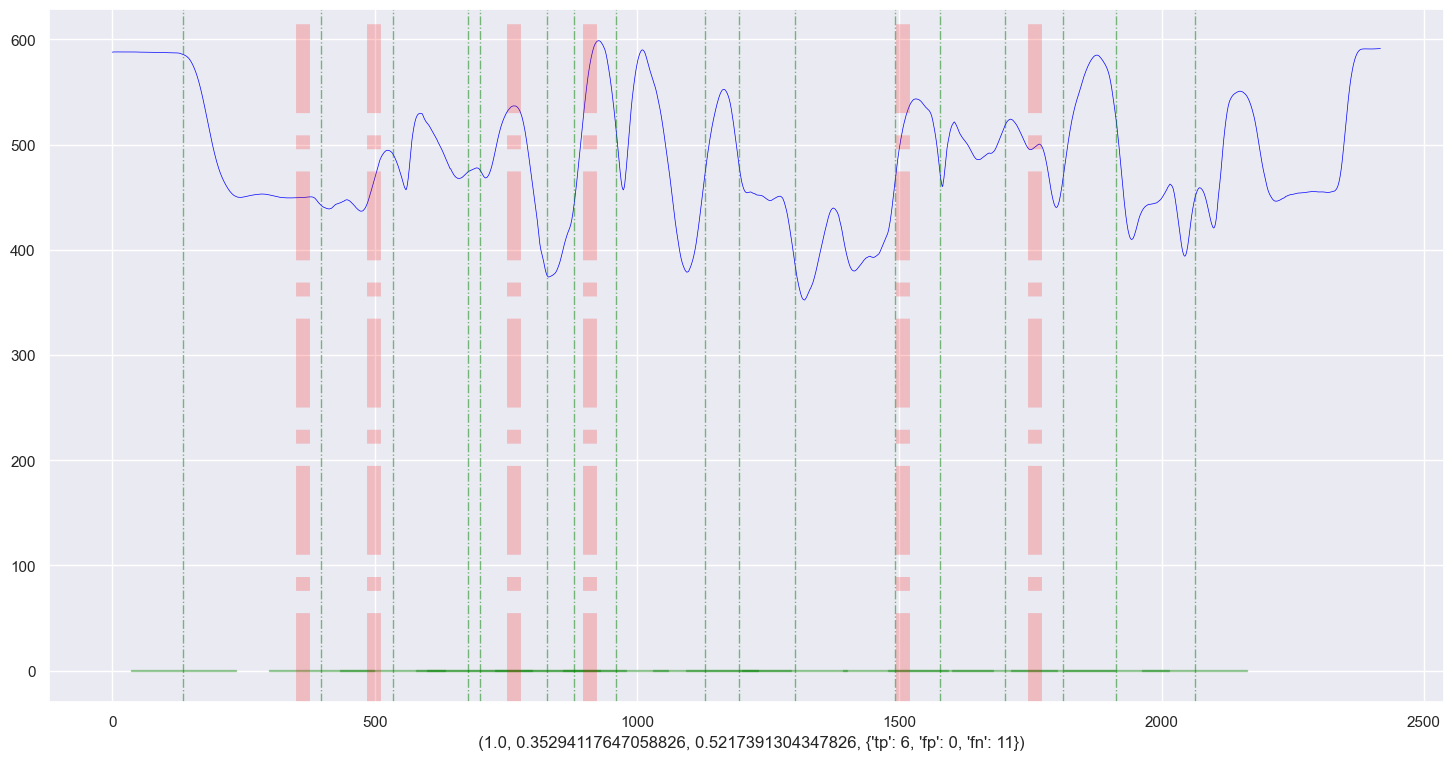

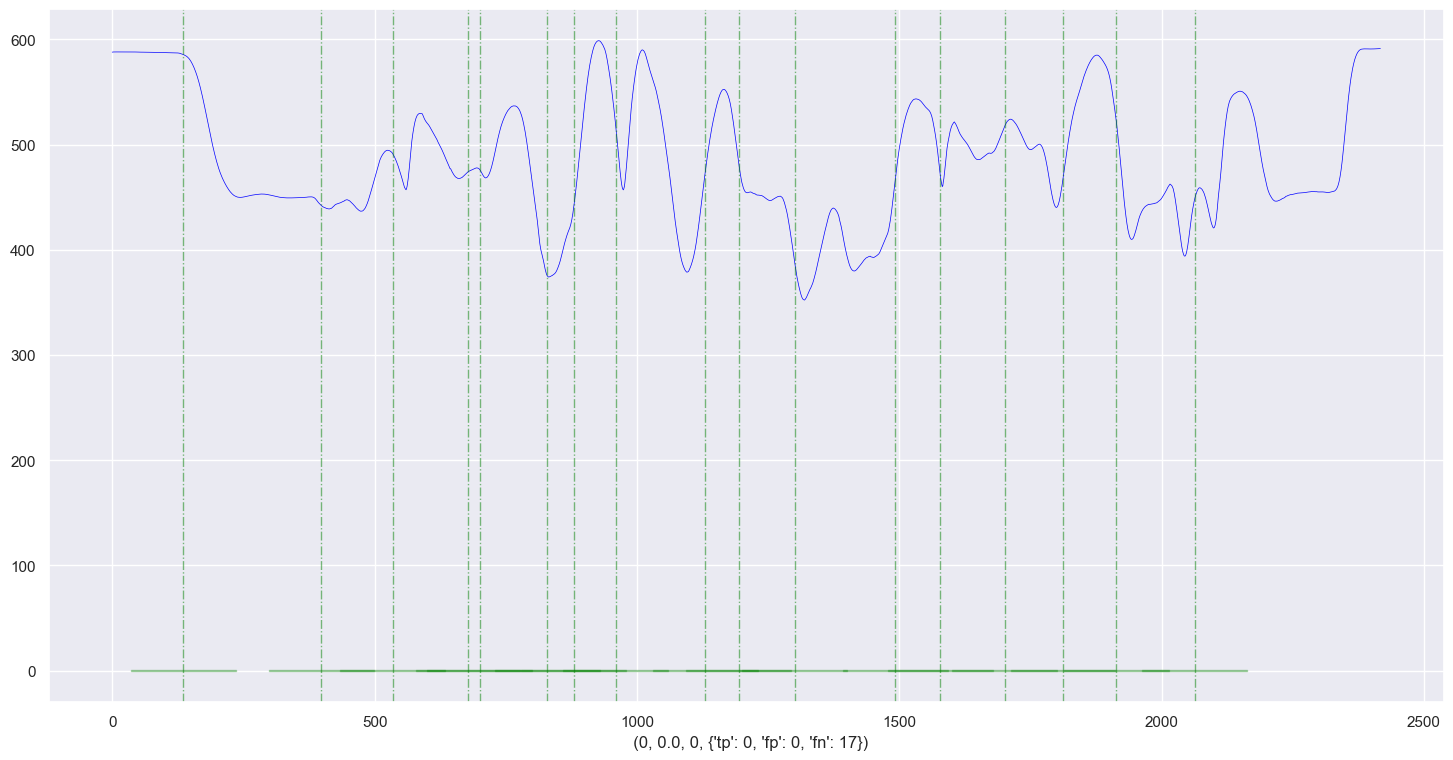

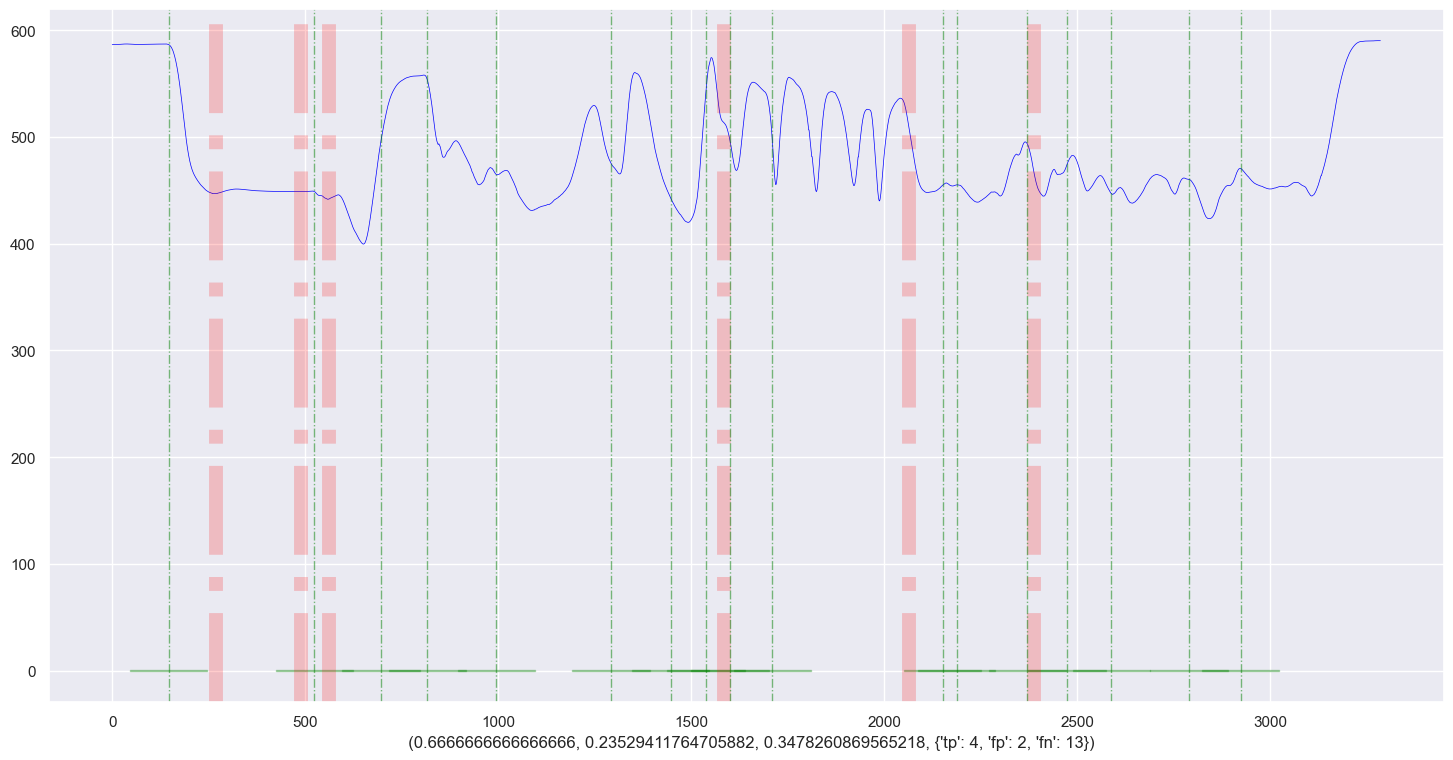

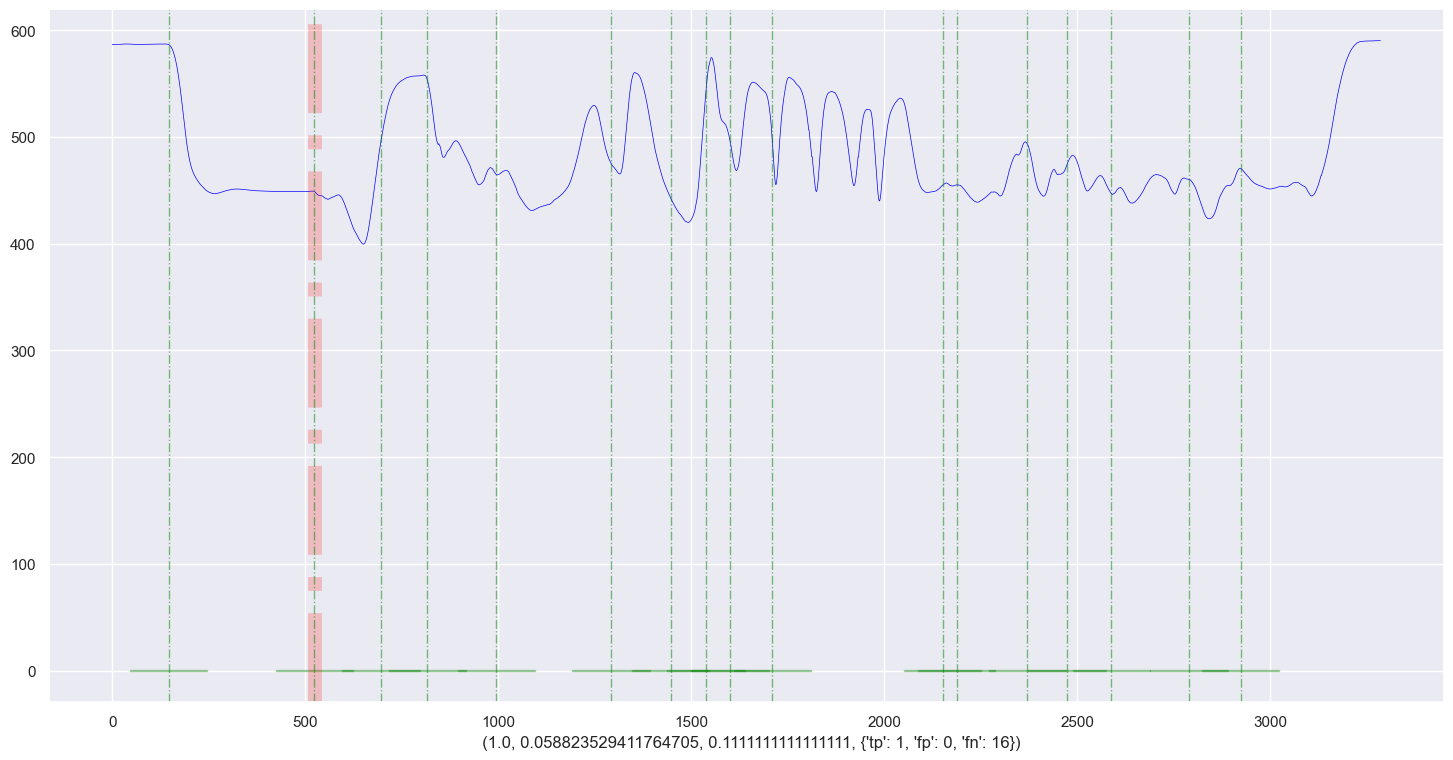

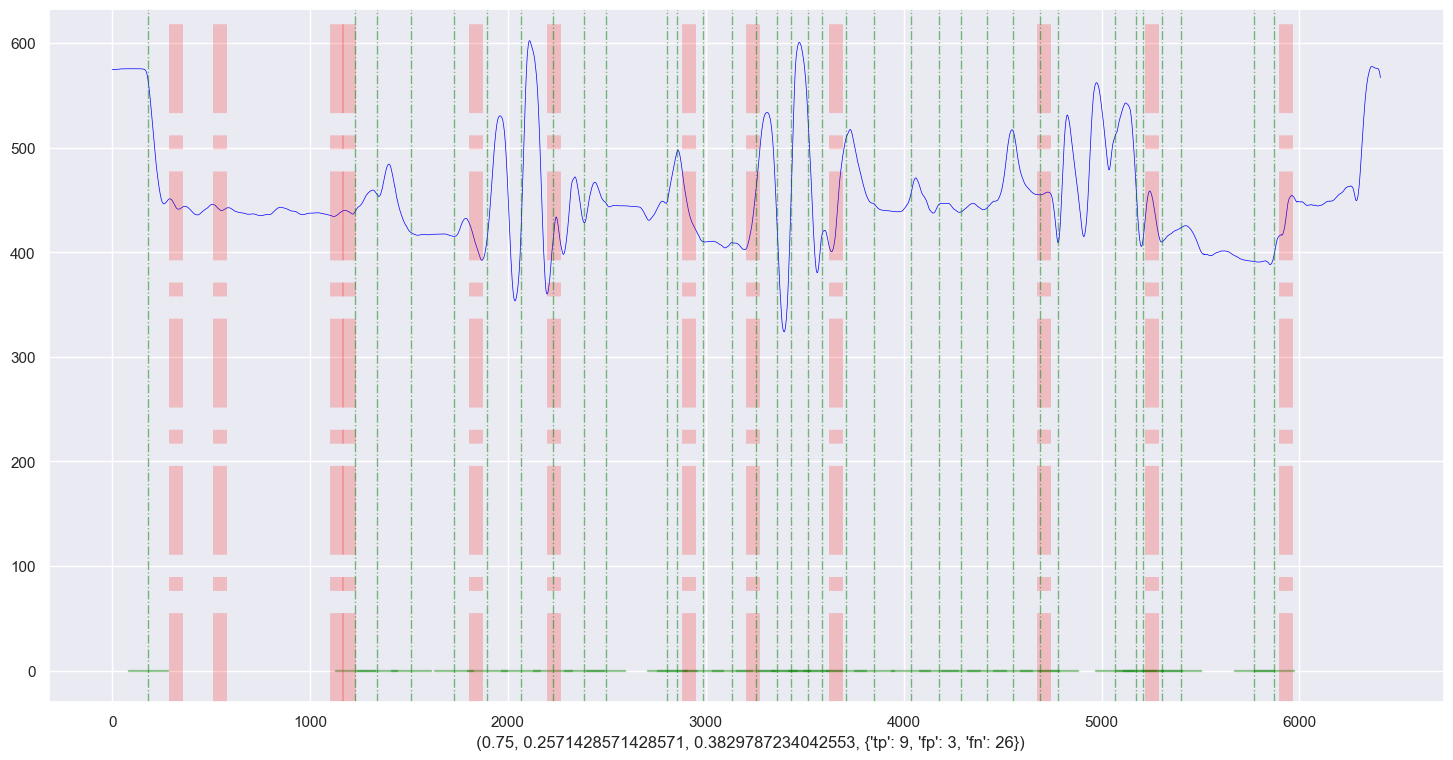

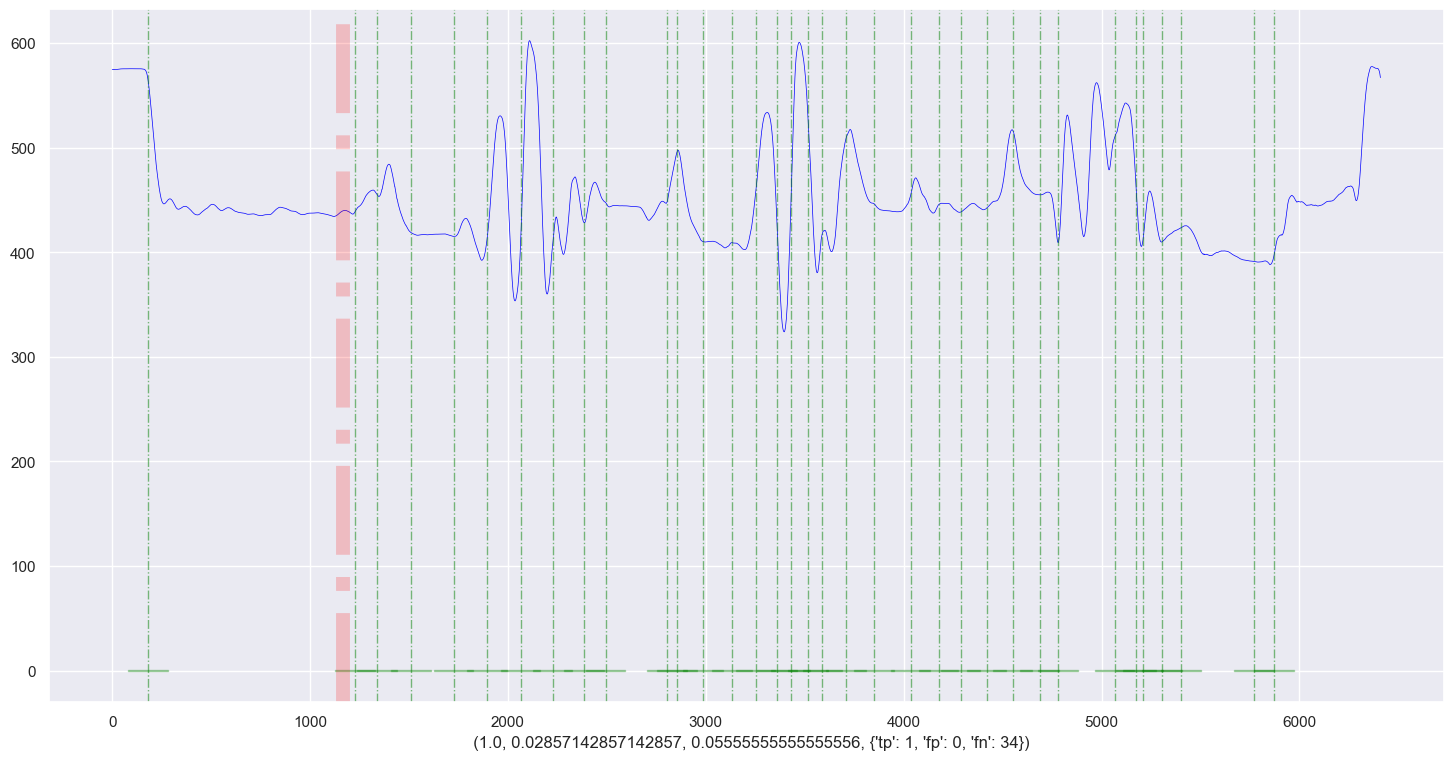

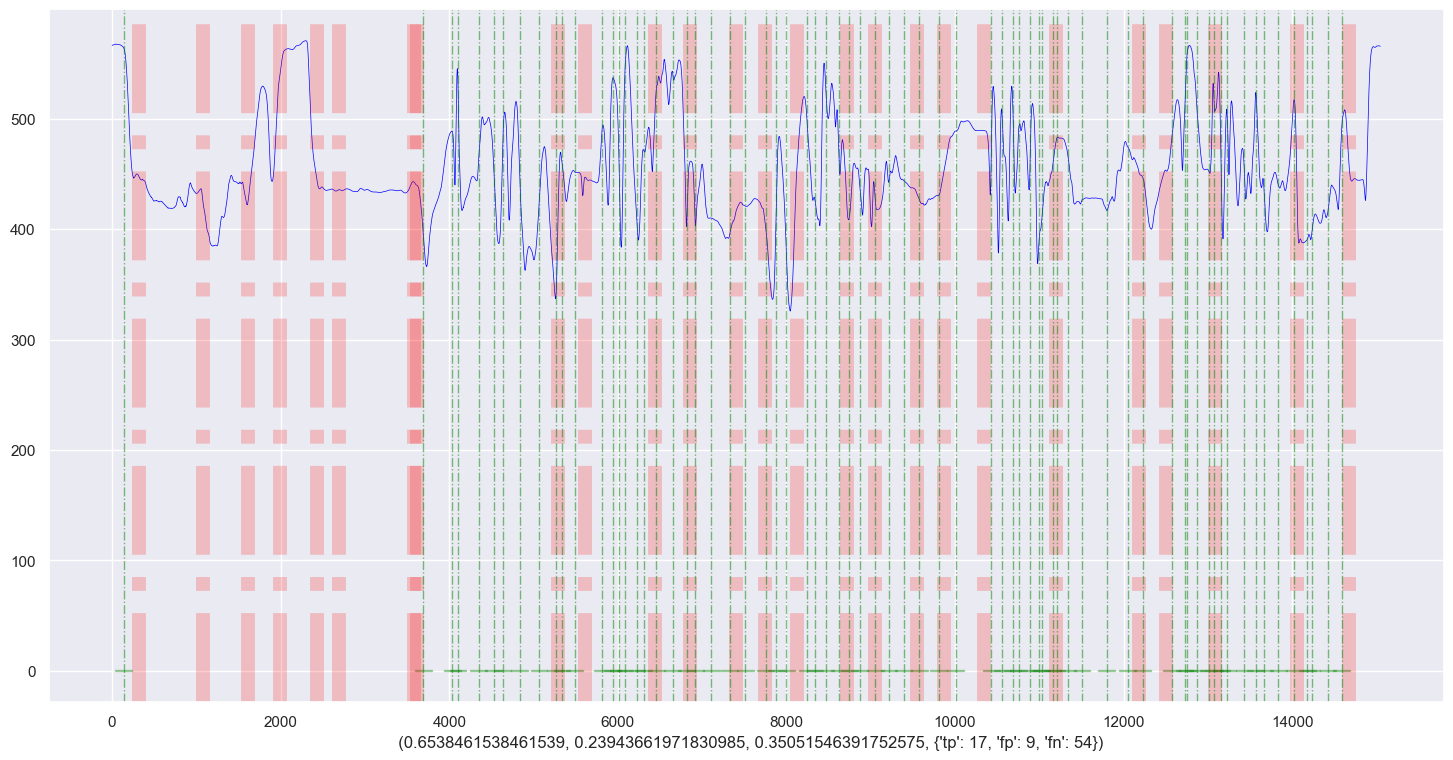

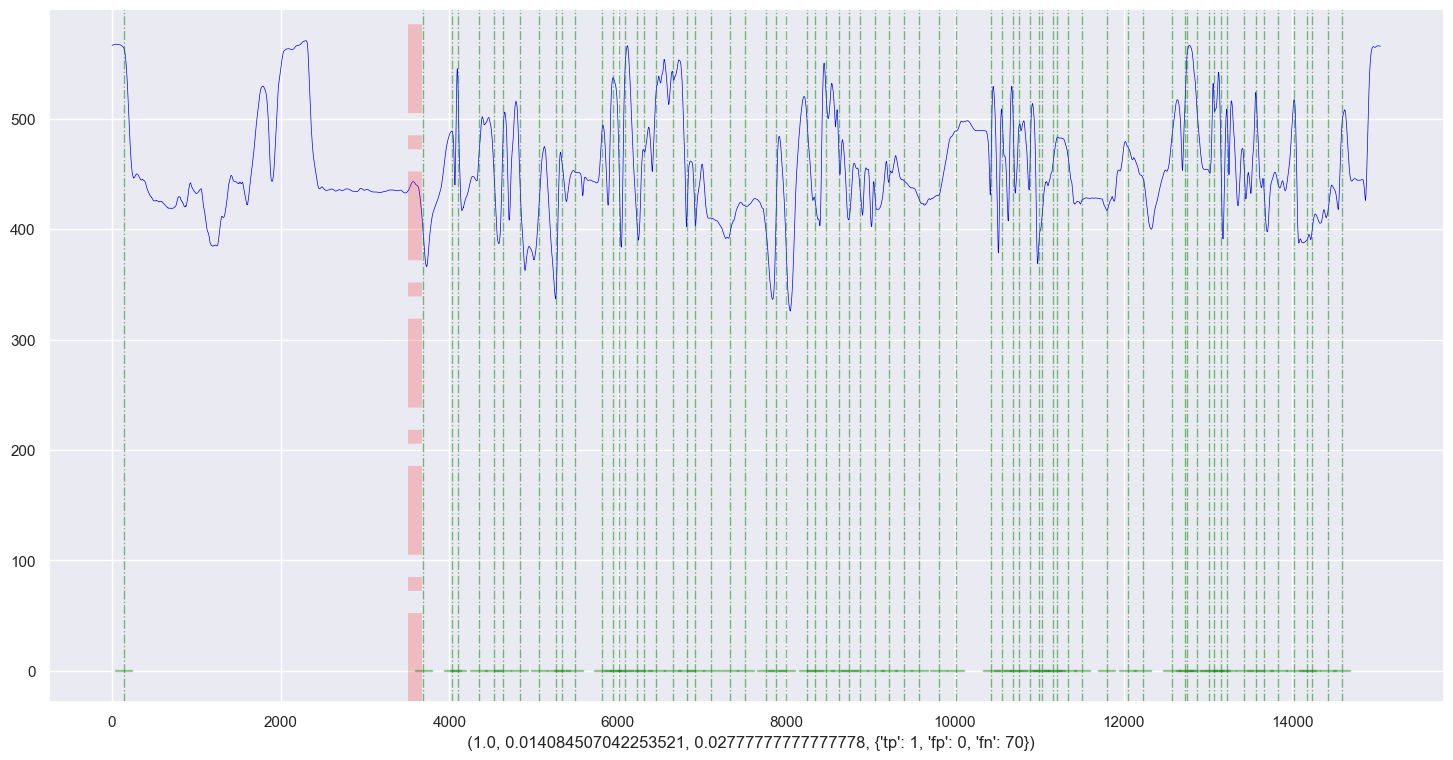

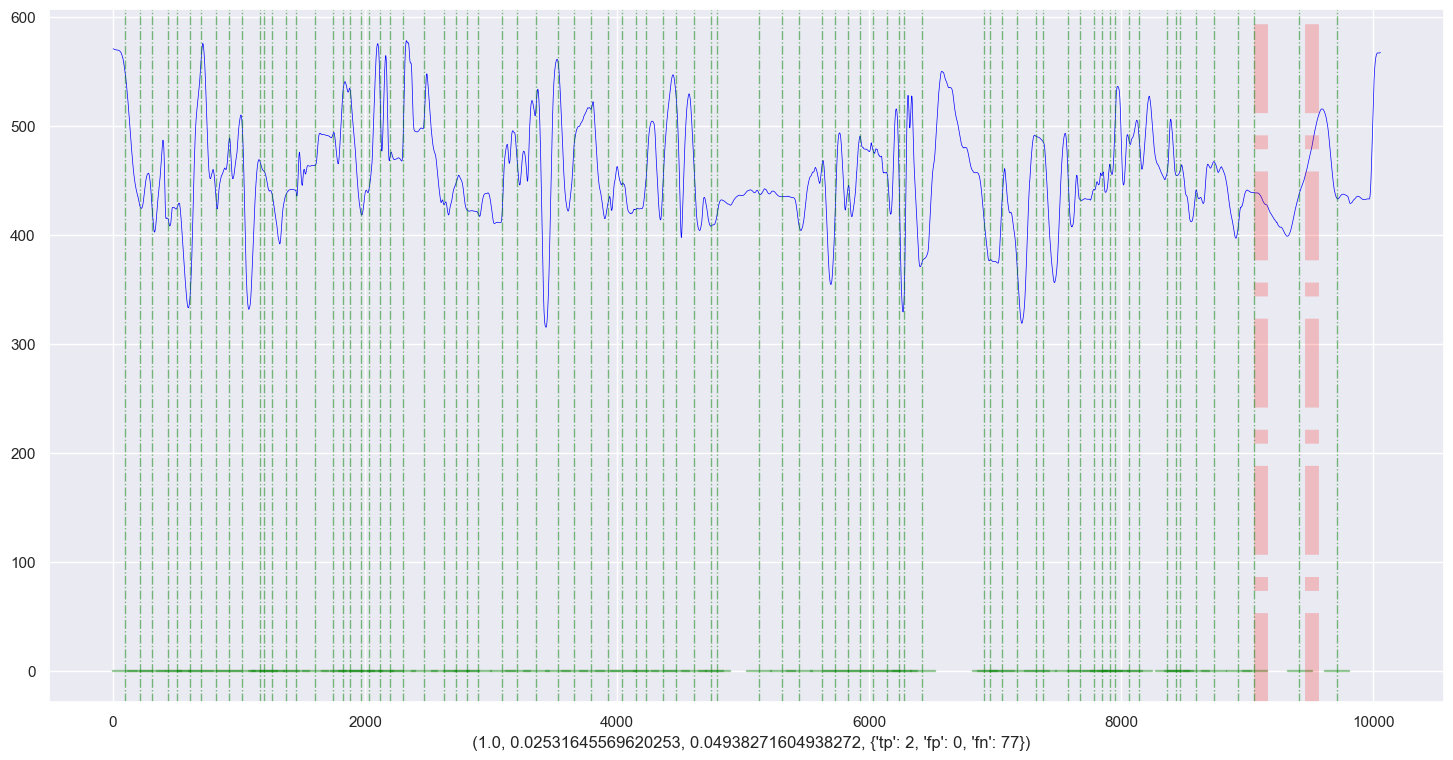

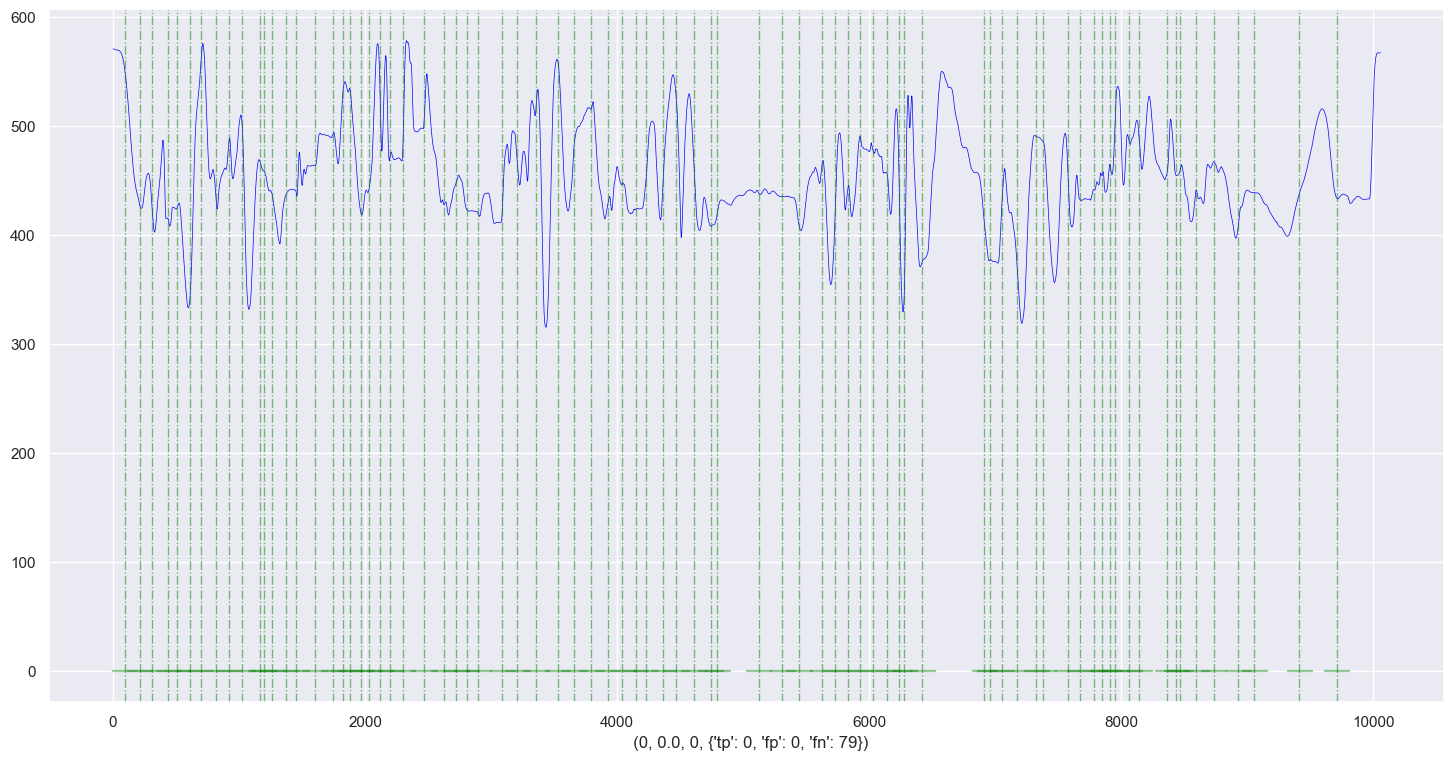

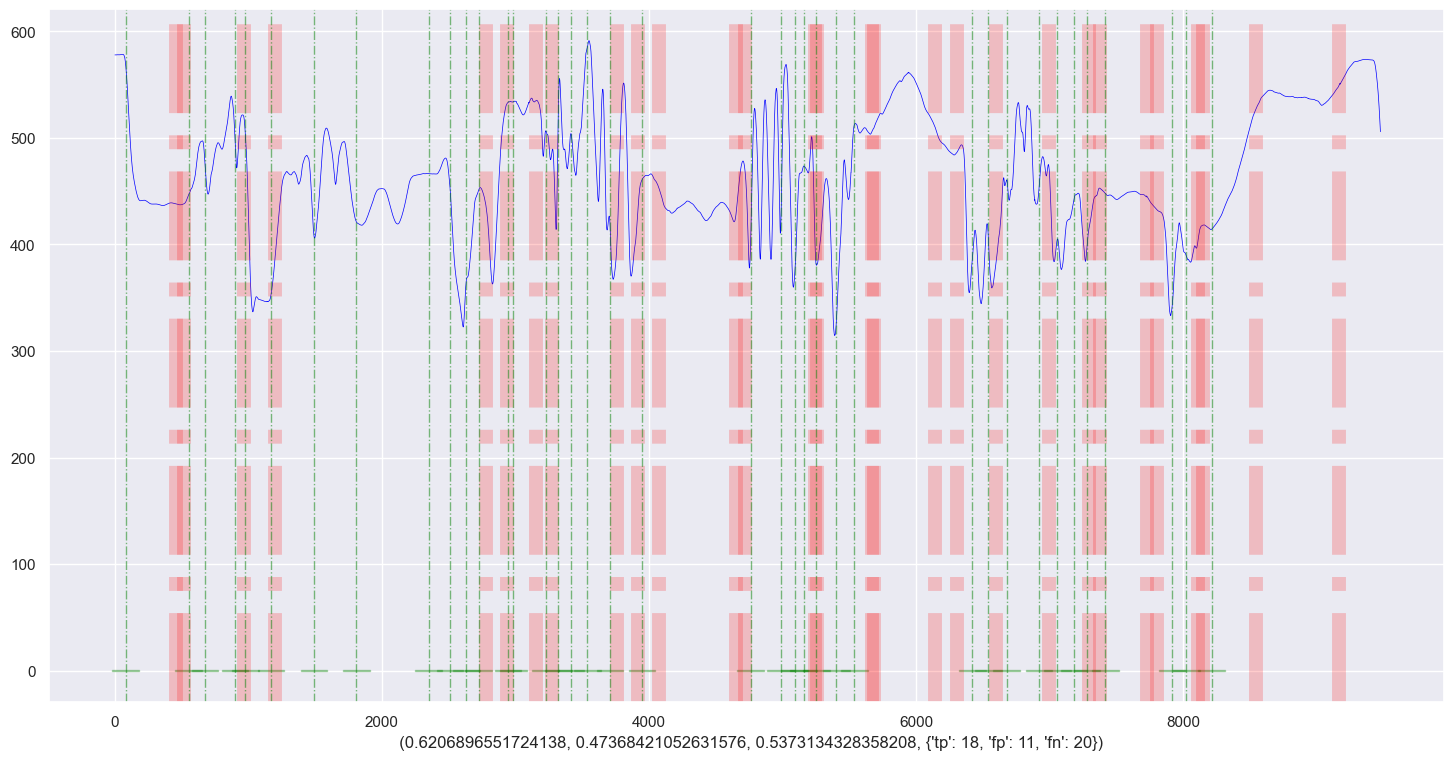

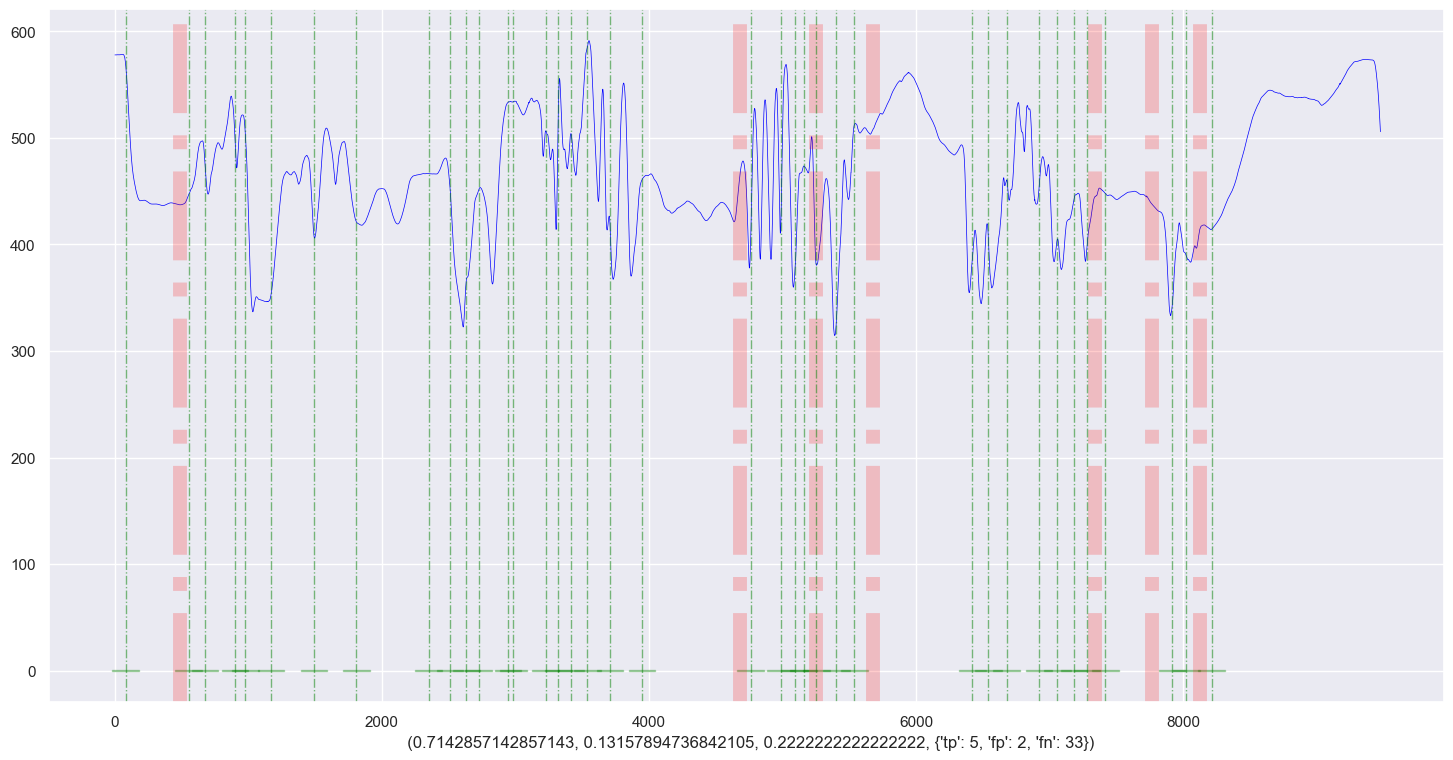

In [ ]:
# usato densità ed energia cinetica totale
for i in range(0,len(dfl)):
    
        df=dfl[i]
        gt=gtl[i]
        cps=np.array(cpsl[i],dtype="object")
        res_raw = UnionCPS(cps[0],cps[3])
        PlotResult(df,gt,res_raw,"",100,"",3)
        res = AndSal(100,2,cps[0],cps[3])
        PlotResult(df,gt,res,"",100,"",3)
        print(f1scoremargin(gt,res,100))

#studio di cora05 per capire la presenza dei falsi positivi
delnear_am=[]
majority_am=[]
cleaned_array = [s[3:-7] for s in timeseries]
resexcel=pd.DataFrame()
resexcel["name"] = cleaned_array
for am in range(0,8):
    delnear_score=[]
    majority_score=[]
    for i in range(0,len(dfl)):
        # prendo i dati per il singolo video
        df=dfl[i]
        gt=gtl[i]
        cps=cpsl[i]

        # unisco le timeseries per salienze

        ariel=np.array([])
        for j in [26,30,34,2,8,14,27,28,29,31,32,33,35,36,37]:
            ariel=np.append(ariel,cps[j])
        ariel=np.sort(ariel.flatten())

        strn=np.array([])
        for j in [38,42,46,1,9,39,40,41,43,44,45,47,48,49]:
            strn=np.append(strn,cps[j])
        strn=np.sort(strn.flatten())

        rhel=np.array([])
        for j in [50,54,58,7,11,18,21,51,52,53,55,56,57,59,60,61]:
            rhel=np.append(rhel,cps[j])
        rhel=np.sort(rhel.flatten())

        lhel=np.array([])
        for j in [62,66,70,6,10,19,20,63,64,65,67,68,69,71,72,73]:
            lhel=np.append(lhel,cps[j])
        lhel=np.sort(lhel.flatten())

        rplm=np.array([])
        for j in [74,78,82,5,13,23,25,75,76,77,79,80,81,83,84,85]:
            rplm=np.append(rplm,cps[j])
        rplm=np.sort(rplm.flatten())

        lplm=np.array([])
        for j in [86,90,94,4,12,22,24,87,88,89,91,92,93,95,96,97]:
            lplm=np.append(lplm,cps[j])
        lplm=np.sort(lplm.flatten())

        # Faccio AND per le varie salienze
        max1=dict()
        max2=dict()
        bestfinal1=lplm
        bestfinal2=lplm

        rplm1=MajorityVoteCP(rplm,100,am)
        lplm1=MajorityVoteCP(lplm,100,am)
        rhel1=MajorityVoteCP(rhel,100,am)
        lhel1=MajorityVoteCP(lhel,100,am)
        ariel1=MajorityVoteCP(ariel,100,am)
        strn1=MajorityVoteCP(strn,100,am)

        # unisco il tutto in un unico array
        final=np.array([])
        final=np.append(final,rplm1)
        final=np.append(final,lplm1)
        final=np.append(final,rhel1)
        final=np.append(final,lhel1)
        final=np.append(final,ariel1)
        final=np.append(final,strn1)
        final=np.sort(final.flatten())
        
        # calcolo il primo OR con MajoriyVote
        final1=MajorityVoteCP(final,100,2)
        final1=IgnoreZone(i,final1,gt)
        _,_,f1,_=f1scoremargin(gt,final1,100)
        if "f1" not in max1:
            max1["f1"] = f1
            max1["single"]=am
            #max1["comb"]=k
            bestfinal1=final1
        elif f1 > max1["f1"]:
            max1["f1"] = f1
            max1["single"]=am
            #max1["comb"]=k
            bestfinal1=final1

        # calcolo il secondo OR con delnear
        final2=delnear(final,100)
        final2=IgnoreZone(i,final2,gt)
        _,_,f1,_=f1scoremargin(gt,final2,100)
        if "f1" not in max2:
            max2["f1"]=f1
            max2["single"]=am
            bestfinal2=final2
        elif f1 > max2["f1"]:
            max2["f1"]=f1
            max2["single"]=am
            bestfinal2=final2


        majority_score.append(max1["f1"])
        delnear_score.append(max2["f1"])
    resexcel[str(am)+"majority"] = majority_score
    resexcel[str(am)+"delnear"] = delnear_score
    


resexcel.to_excel("outputFile/majtest2_majvsdel.xlsx")